In [1]:
import warnings
warnings.simplefilter(action='ignore')
import os
import json
#import geopandas as gpd
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Configure Notebook
#for plots to be inline
%matplotlib inline 
#for auto_complete 
%config Completer.use_jedi = False 

plt.style.use('fivethirtyeight')
sns.set_context("notebook")

In [2]:
!pip install folium

In [3]:
import folium

In [4]:
!pip install geopandas

In [5]:
import geopandas as gpd

In [6]:
train_df = pd.read_csv('clean_weather_station.csv',index_col=[0])

In [7]:
train_df.head()

,time,bikes_available,docks_available,distance_to_nearest_transit_Miles,Latitude,Longitude,merge_time,index,max_temperature_f,mean_temperature_f,...,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code,percentage,50%
bike_station_name,,,,,,,,,,,,,,,,,,,,,
2nd at Folsom,2013-08-29 12:00:00,9.500000,9.500000,0.031746,37.785299,-122.396236,2013-08-29,0,74.0,68.0,...,10.0,23.0,11.0,0.0,4.0,clear,286.0,94107,0.500000,1.0
2nd at Folsom,2013-08-29 13:00:00,9.264151,9.735849,0.031746,37.785299,-122.396236,2013-08-29,0,74.0,68.0,...,10.0,23.0,11.0,0.0,4.0,clear,286.0,94107,0.512413,1.0
2nd at Folsom,2013-08-29 14:00:00,9.928571,9.071429,0.031746,37.785299,-122.396236,2013-08-29,0,74.0,68.0,...,10.0,23.0,11.0,0.0,4.0,clear,286.0,94107,0.477444,0.0
2nd at Folsom,2013-08-29 15:00:00,10.055556,8.944444,0.031746,37.785299,-122.396236,2013-08-29,0,74.0,68.0,...,10.0,23.0,11.0,0.0,4.0,clear,286.0,94107,0.470760,0.0
2nd at Folsom,2013-08-29 16:00:00,10.000000,9.000000,0.031746,37.785299,-122.396236,2013-08-29,0,74.0,68.0,...,10.0,23.0,11.0,0.0,4.0,clear,286.0,94107,0.473684,0.0


In [8]:
train_df.describe()

,bikes_available,docks_available,distance_to_nearest_transit_Miles,Latitude,Longitude,index,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,precipitation_inches,cloud_cover,wind_dir_degrees,zip_code,percentage,50%
count,1.204834e+06,1.204834e+06,1.204834e+06,1.204834e+06,1.204834e+06,1.204834e+06,1.204834e+06,1.204834e+06,1.204834e+06,1.204834e+06,...,1.204834e+06,1.204834e+06,1.204834e+06,1.204834e+06,1.204834e+06,1.204834e+06,1.204834e+06,1204834.0,1.204833e+06,1.204833e+06
mean,8.395342e+00,9.284571e+00,4.225840e+00,3.759259e+01,-1.222206e+02,1.305752e+03,6.843928e+01,6.046011e+01,5.201746e+01,5.254780e+01,...,9.542784e+00,7.875432e+00,1.891511e+01,8.206720e+00,3.332633e-02,3.854973e+00,2.548167e+02,94107.0,5.238836e-01,5.523604e-01
std,3.935233e+00,4.121343e+00,5.961432e+00,2.019536e-01,2.077293e-01,8.001133e+02,7.253261e+00,6.121853e+00,6.407282e+00,5.468568e+00,...,1.031418e+00,2.885089e+00,5.734223e+00,3.619720e+00,1.768980e-01,2.273888e+00,6.820781e+01,0.0,1.899110e-01,4.972510e-01
min,0.000000e+00,0.000000e+00,1.691848e-03,3.732973e+01,-1.224190e+02,0.000000e+00,4.700000e+01,4.100000e+01,3.200000e+01,2.700000e+01,...,4.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,94107.0,0.000000e+00,0.000000e+00
25%,6.000000e+00,6.333333e+00,3.348312e-02,3.738922e+01,-1.224008e+02,9.280000e+02,6.300000e+01,5.600000e+01,4.700000e+01,4.900000e+01,...,1.000000e+01,7.000000e+00,1.500000e+01,6.000000e+00,0.000000e+00,2.000000e+00,2.520000e+02,94107.0,4.000000e-01,0.000000e+00
50%,8.000000e+00,9.000000e+00,1.935685e-01,3.777106e+01,-1.223880e+02,1.845000e+03,6.800000e+01,6.000000e+01,5.200000e+01,5.300000e+01,...,1.000000e+01,1.000000e+01,2.000000e+01,8.000000e+00,0.000000e+00,4.000000e+00,2.750000e+02,94107.0,5.333333e-01,1.000000e+00
75%,1.056667e+01,1.198333e+01,8.202581e+00,3.778845e+01,-1.220767e+02,2.025000e+03,7.300000e+01,6.500000e+01,5.700000e+01,5.700000e+01,...,1.000000e+01,1.000000e+01,2.200000e+01,1.000000e+01,0.000000e+00,6.000000e+00,2.940000e+02,94107.0,6.611111e-01,1.000000e+00
max,2.700000e+01,2.700000e+01,1.817737e+01,3.780477e+01,-1.218773e+02,2.204000e+03,9.300000e+01,7.700000e+01,6.500000e+01,6.600000e+01,...,1.000000e+01,1.000000e+01,4.300000e+01,2.200000e+01,3.120000e+00,8.000000e+00,3.600000e+02,94107.0,1.000000e+00,1.000000e+00


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1204834 entries, 2nd at Folsom to Yerba Buena Center of the Arts (3rd @ Howard)
Data columns (total 32 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   time                               1204834 non-null  object 
 1   bikes_available                    1204834 non-null  float64
 2   docks_available                    1204834 non-null  float64
 3   distance_to_nearest_transit_Miles  1204834 non-null  float64
 4   Latitude                           1204834 non-null  float64
 5   Longitude                          1204834 non-null  float64
 6   merge_time                         1204834 non-null  object 
 7   index                              1204834 non-null  int64  
 8   max_temperature_f                  1204834 non-null  float64
 9   mean_temperature_f                 1204834 non-null  float64
 10  min_temperature_f                  1204834 no

Encode object variables (precipitation (inches) and events) for visualization and exploration.

In [10]:
train_df['time'] = pd.to_datetime(train_df['time'])
train_df['hour'] = train_df['time'].dt.hour


train_df['events'].replace({'clear':0, 'fog':1, 'rain':2, 'fog-rain':3, 'rain-thunderstorm':4}, inplace=True)

This section is to confirm which variables have outliers and ensure that those variables do not affect the final model.

In [11]:
train_df.columns

Index(['time', 'bikes_available', 'docks_available',
       'distance_to_nearest_transit_Miles', 'Latitude', 'Longitude',
       'merge_time', 'index', 'max_temperature_f', 'mean_temperature_f',
       'min_temperature_f', 'max_dew_point_f', 'mean_dew_point_f',
       'min_dew_point_f', 'max_humidity', 'mean_humidity', 'min_humidity',
       'max_sea_level_pressure_inches', 'mean_sea_level_pressure_inches',
       'min_sea_level_pressure_inches', 'max_visibility_miles',
       'mean_visibility_miles', 'min_visibility_miles', 'max_wind_Speed_mph',
       'mean_wind_speed_mph', 'precipitation_inches', 'cloud_cover', 'events',
       'wind_dir_degrees', 'zip_code', 'percentage', '50%', 'hour'],
      dtype='object')

In [12]:
#Check all non-object columns (excludes time, merge time, precipitation (inches), and events)
contain_outliers = ['bikes_available', 'docks_available',
       'Latitude', 'Longitude', 'distance_to_nearest_transit_Miles', 'max_temperature_f', 'mean_temperature_f',
       'min_temperature_f', 'max_dew_point_f', 'mean_dew_point_f',
       'min_dew_point_f', 'max_humidity', 'mean_humidity', 'min_humidity',
       'max_sea_level_pressure_inches', 'mean_sea_level_pressure_inches',
       'min_sea_level_pressure_inches', 'max_visibility_miles',
       'mean_visibility_miles', 'min_visibility_miles', 'max_wind_Speed_mph',
       'mean_wind_speed_mph',
       'cloud_cover', 'wind_dir_degrees', 'zip_code', 'percentage',
       '50%']

upper_lim_list = []

for col in contain_outliers:
    IQR = train_df[col].quantile(0.75) - train_df[col].quantile(0.25)
    Lower_lim = train_df[col].quantile(0.25) - (IQR * 1.5)
    Upper_lim = train_df[col].quantile(0.75) + (IQR * 1.5)
    upper_lim_list.append(Upper_lim)
    print('Outliers in {name} are < {lowerboundary:.2f} or > {upperboundary:.3f}'
          .format(name = col, lowerboundary=Lower_lim, upperboundary=Upper_lim))
    print('number of outliers: {:.2f} % \n ----'
          .format(train_df[train_df[col] > Upper_lim].shape[0]/train_df[col].shape[0]*100))

outliers_dic = dict(zip(contain_outliers, upper_lim_list))

Outliers in bikes_available are < -0.85 or > 17.417
number of outliers: 2.86 % 
 ----
Outliers in docks_available are < -2.14 or > 20.458
number of outliers: 1.12 % 
 ----
Outliers in Latitude are < 36.79 or > 38.387
number of outliers: 0.00 % 
 ----
Outliers in Longitude are < -122.89 or > -121.591
number of outliers: 0.00 % 
 ----
Outliers in distance_to_nearest_transit_Miles are < -12.22 or > 20.456
number of outliers: 0.00 % 
 ----
Outliers in max_temperature_f are < 48.00 or > 88.000
number of outliers: 1.25 % 
 ----
Outliers in mean_temperature_f are < 42.50 or > 78.500
number of outliers: 0.00 % 
 ----
Outliers in min_temperature_f are < 32.00 or > 72.000
number of outliers: 0.00 % 
 ----
Outliers in max_dew_point_f are < 37.00 or > 69.000
number of outliers: 0.00 % 
 ----
Outliers in mean_dew_point_f are < 34.00 or > 66.000
number of outliers: 0.00 % 
 ----
Outliers in min_dew_point_f are < 24.50 or > 68.500
number of outliers: 0.00 % 
 ----
Outliers in max_humidity are < 68.00

**Outliers Analysis**
The dataset lacks variables with significant outliers, the highest being 2.86% for bikes_available.


array([[<AxesSubplot:title={'center':'time'}>,
        <AxesSubplot:title={'center':'bikes_available'}>,
        <AxesSubplot:title={'center':'docks_available'}>,
        <AxesSubplot:title={'center':'distance_to_nearest_transit_Miles'}>,
        <AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>],
       [<AxesSubplot:title={'center':'index'}>,
        <AxesSubplot:title={'center':'max_temperature_f'}>,
        <AxesSubplot:title={'center':'mean_temperature_f'}>,
        <AxesSubplot:title={'center':'min_temperature_f'}>,
        <AxesSubplot:title={'center':'max_dew_point_f'}>,
        <AxesSubplot:title={'center':'mean_dew_point_f'}>],
       [<AxesSubplot:title={'center':'min_dew_point_f'}>,
        <AxesSubplot:title={'center':'max_humidity'}>,
        <AxesSubplot:title={'center':'mean_humidity'}>,
        <AxesSubplot:title={'center':'min_humidity'}>,
        <AxesSubplot:title={'center':'max_sea_level_pressure_inches'}>,
        <AxesS

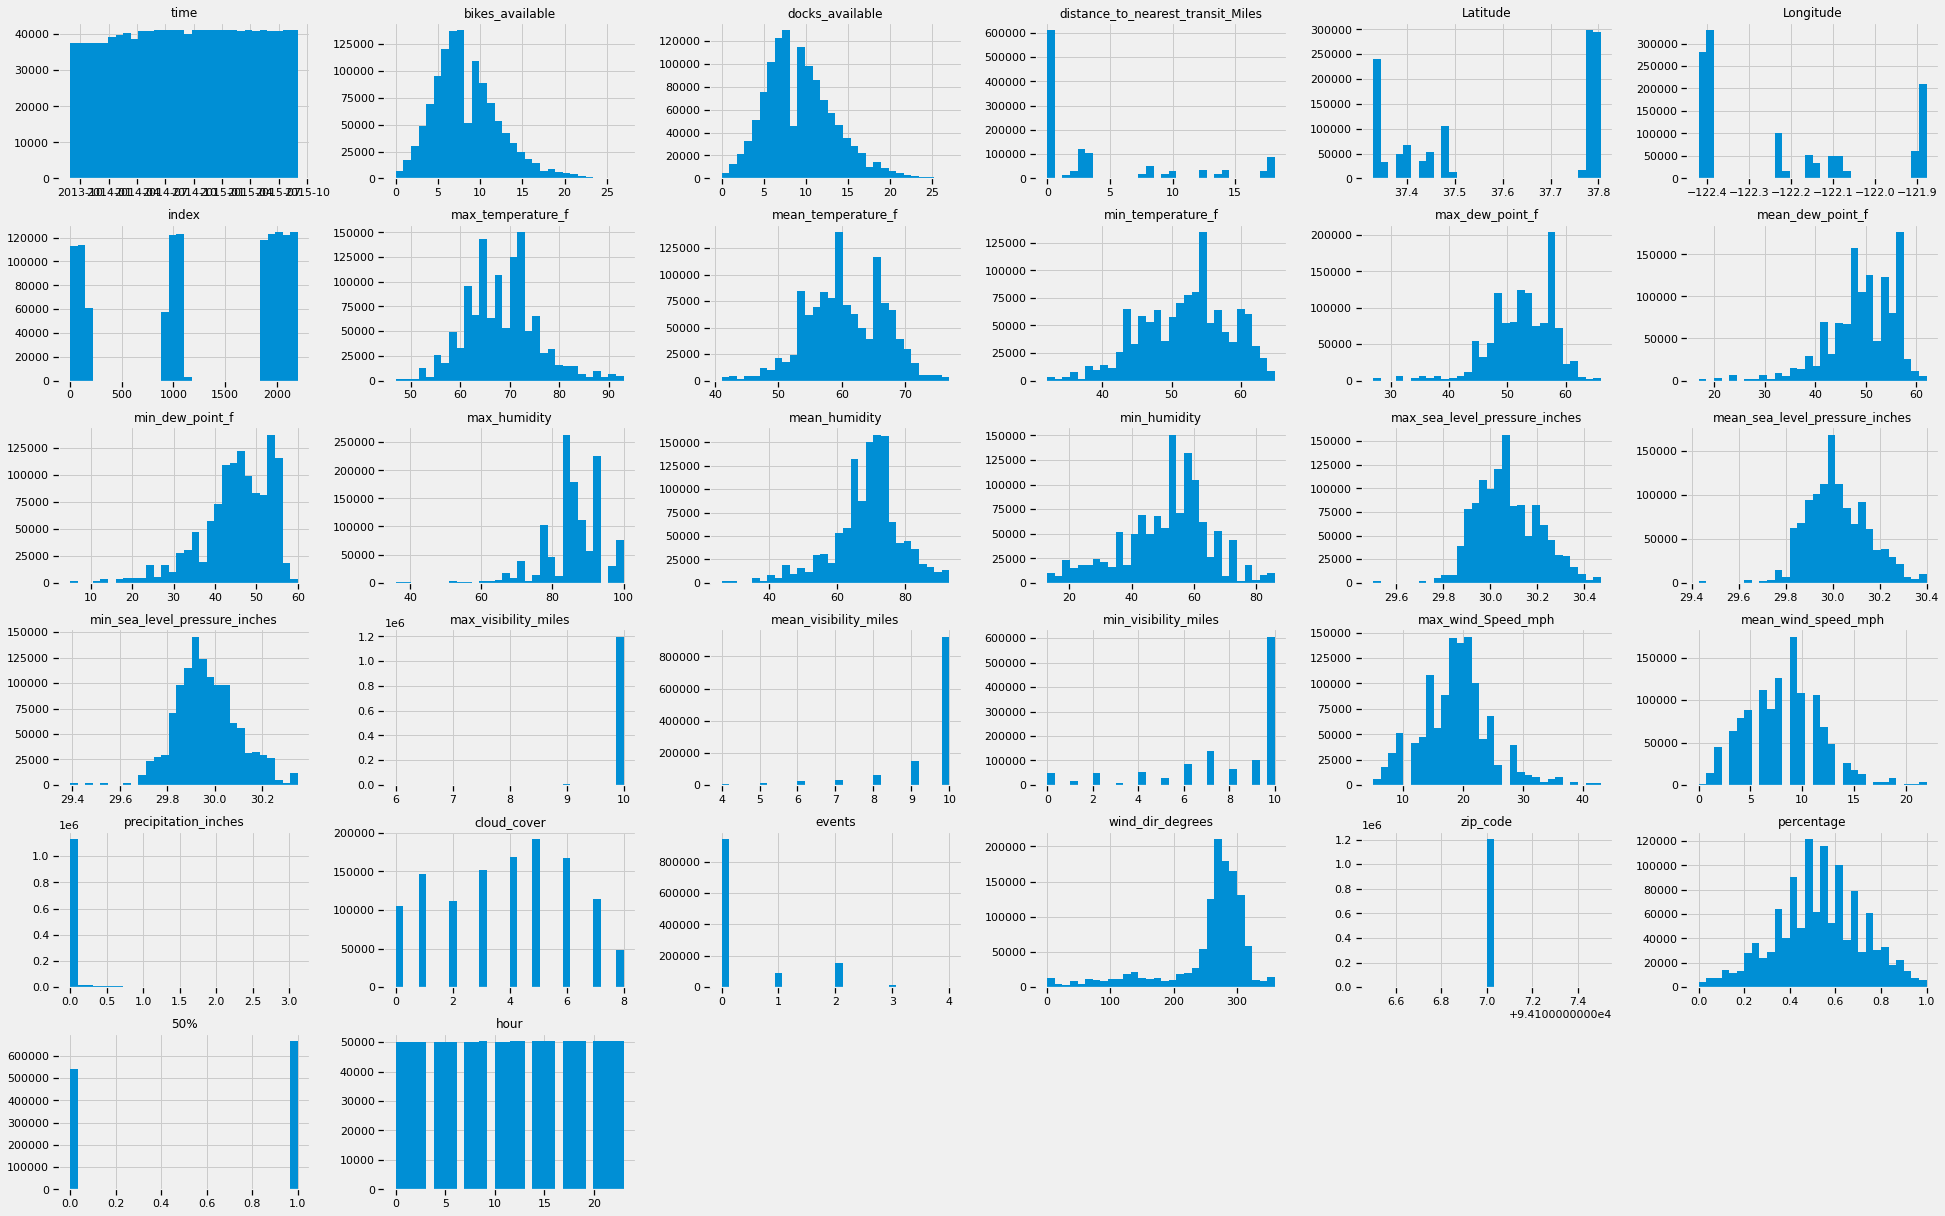

In [13]:
#Histogram of all numerical variables in the dataset
train_df.hist(bins=30, figsize=(30, 20))

Text(0.5, 1.0, 'Distribution in 50% Target Variable')

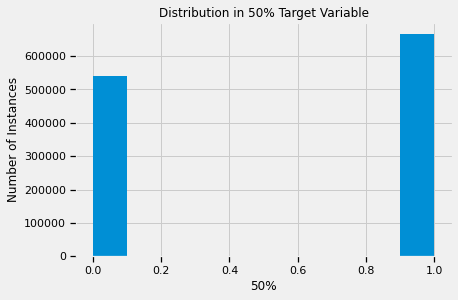

In [14]:
train_df['50%'].hist()
plt.xlabel('50%')
plt.ylabel('Number of Instances')
plt.title('Distribution in 50% Target Variable')

Text(0.5, 1.0, 'Percentage of Yes/No in 50% Target Variable')

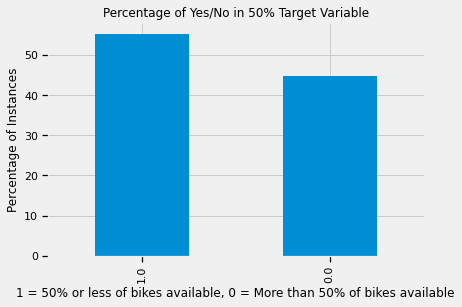

In [15]:
availability_comparison = (train_df['50%'].value_counts()*100.0 / len(train_df)).plot(kind='bar')
plt.xlabel('1 = 50% or less of bikes available, 0 = More than 50% of bikes available')
plt.ylabel('Percentage of Instances')
plt.title('Percentage of Yes/No in 50% Target Variable')


In [16]:
#Determines which variables are most correlated to 50% target variable
train_df.corr().abs()['50%'].sort_values(ascending=False)


50%                                  1.000000
percentage                           0.797178
bikes_available                      0.672059
docks_available                      0.671665
index                                0.061289
Longitude                            0.056731
Latitude                             0.052397
min_dew_point_f                      0.019920
mean_dew_point_f                     0.019170
max_humidity                         0.018176
mean_humidity                        0.015320
distance_to_nearest_transit_Miles    0.013509
max_dew_point_f                      0.013254
max_sea_level_pressure_inches        0.012785
cloud_cover                          0.012394
min_temperature_f                    0.011353
mean_temperature_f                   0.011136
min_humidity                         0.011010
hour                                 0.010842
mean_sea_level_pressure_inches       0.010623
wind_dir_degrees                     0.009208
max_temperature_f                 

Though percentage, bikes_available, and docks_available are the most correlated to 50% none of them can be used as they were used to make the target variable.

Text(0.5, 1.0, 'Correlation to 50% Target Variable')

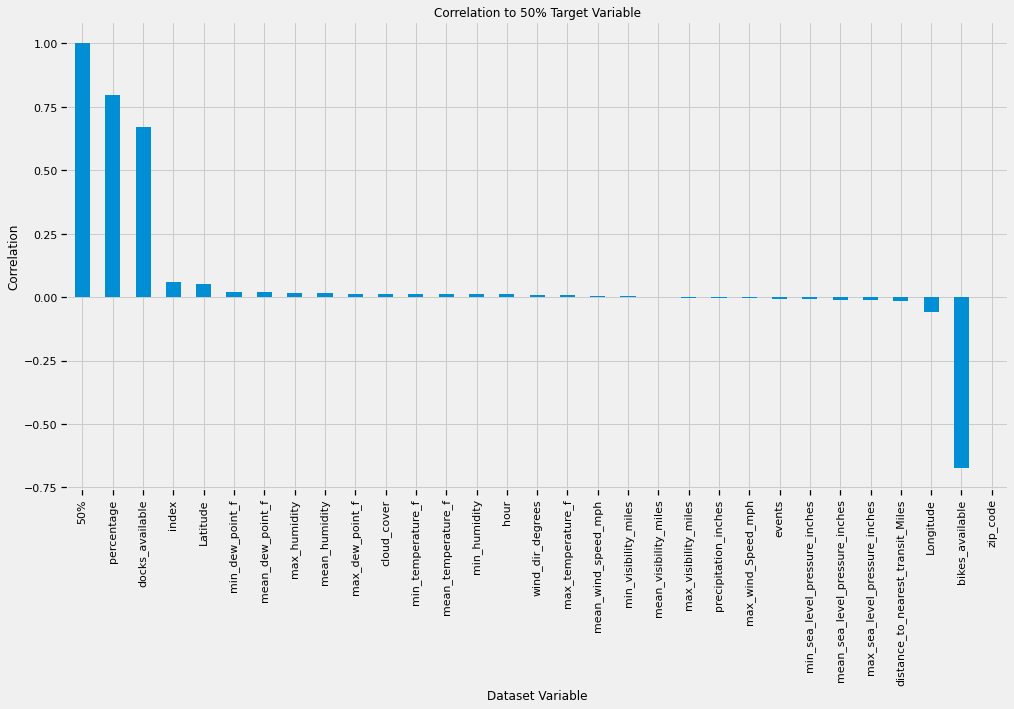

In [17]:
#Create correlation with 50% graph
plt.figure(figsize=(15,8))
train_df.corr()['50%'].sort_values(ascending = False).plot(kind='bar')
plt.xlabel('Dataset Variable')
plt.ylabel('Correlation')
plt.title('Correlation to 50% Target Variable')

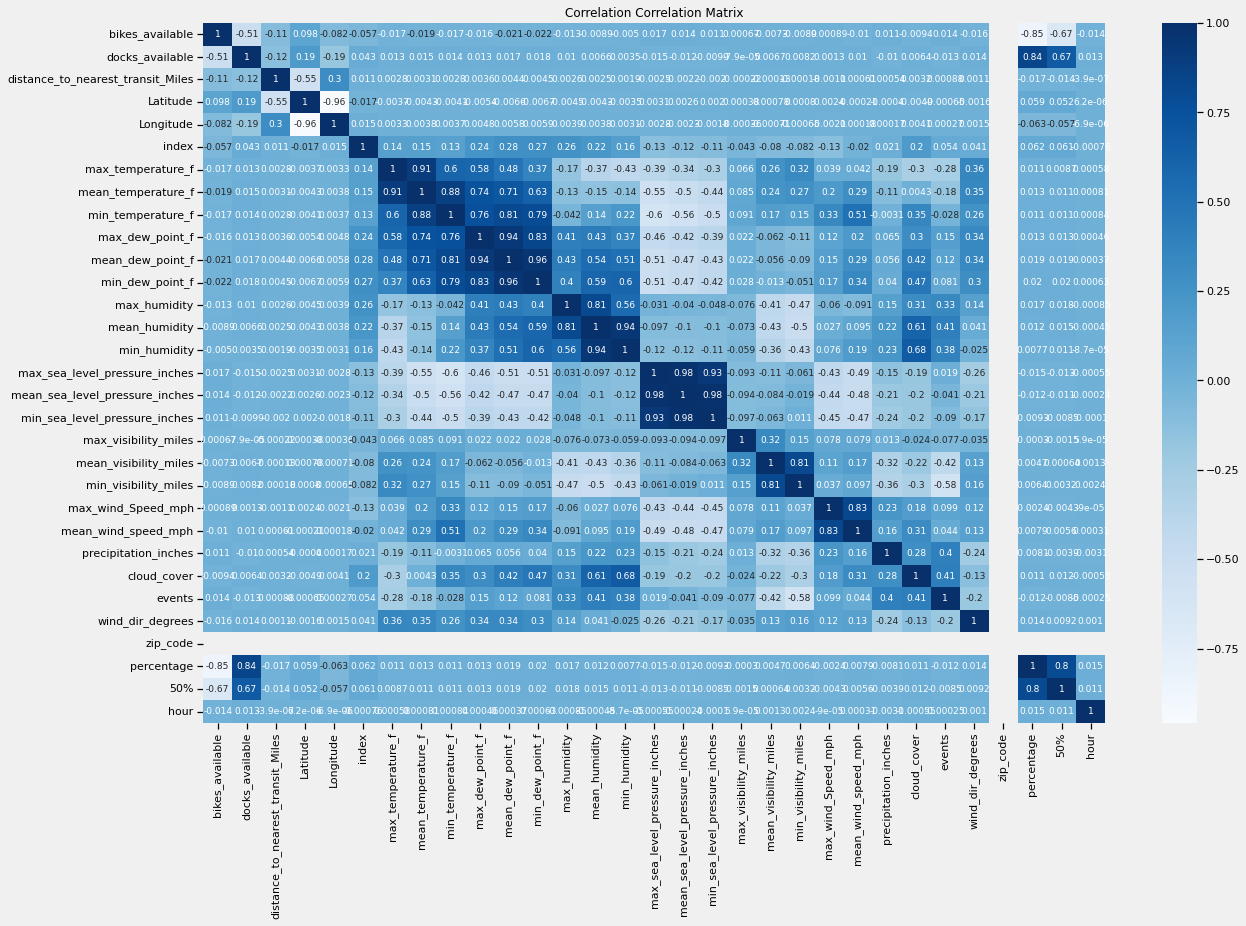

In [18]:
#Create correlation matrix
correlation = train_df.corr()

plt.figure(figsize=(18,12))
sns.heatmap(correlation, annot=True, annot_kws={"size":9},cmap="Blues")
plt.title("Correlation Correlation Matrix")
plt.show()

Analyze the correlation matrix and determine the most correlated variables to put into a list for future reference and feature engineering.

In [19]:
significant_correlation = ['bikes_available', 'docks_available',
       'Latitude', 'Longitude', 'distance_to_nearest_transit_Miles','percentage',
       '50%', 'max_temperature_f', 'mean_temperature_f',
       'min_temperature_f', 'max_dew_point_f', 'mean_dew_point_f',
       'min_dew_point_f', 'max_humidity', 'mean_humidity', 'min_humidity',
       'max_sea_level_pressure_inches', 'mean_sea_level_pressure_inches',
       'min_sea_level_pressure_inches', 'max_visibility_miles',
       'mean_visibility_miles', 'min_visibility_miles', 'max_wind_Speed_mph',
       'mean_wind_speed_mph']

In [20]:
# sns.pairplot(train_df[significant_correlation], kind='scatter', diag_kind='hist', palette='Rainbow')
# plt.show()

In [21]:
significant_correlation_v2 = ['bikes_available', 'docks_available',
       'Latitude', 'Longitude', 'distance_to_nearest_transit_Miles','percentage',
       '50%', 'max_temperature_f', 'mean_temperature_f',
       'min_temperature_f', 'max_dew_point_f', 'mean_dew_point_f',
       'min_dew_point_f', 'max_humidity', 'mean_humidity', 'min_humidity',
       'max_sea_level_pressure_inches', 'mean_sea_level_pressure_inches',
       'min_sea_level_pressure_inches', 'max_visibility_miles',
       'mean_visibility_miles', 'min_visibility_miles', 'max_wind_Speed_mph',
       'mean_wind_speed_mph', 'max_gust_speed_mph', 'events']

**Analyse distplots of the most correlated variables with the target variable.**

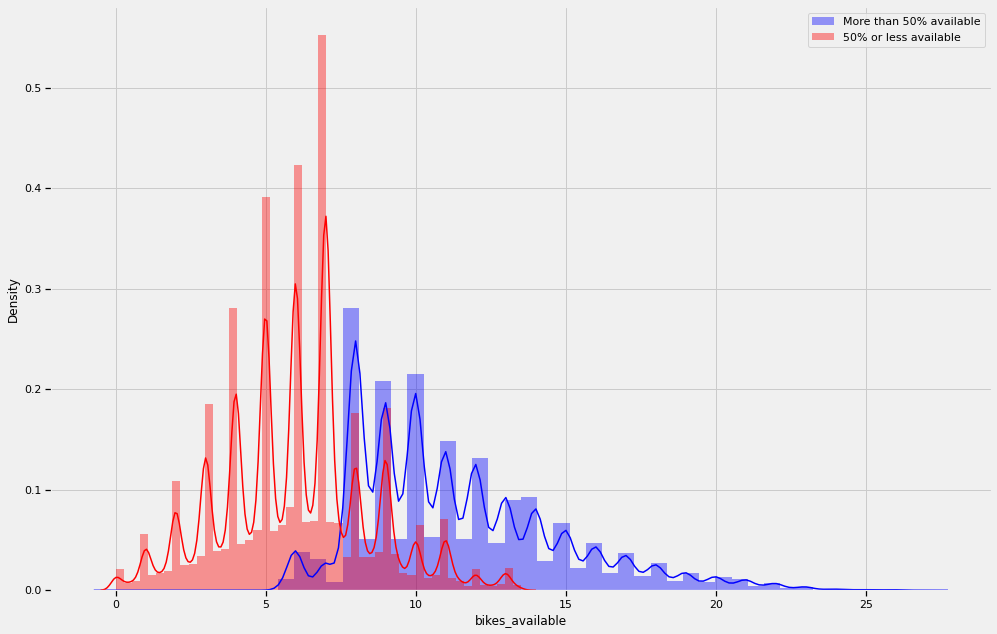

In [22]:
fig, ax = plt.subplots(figsize=(15,10))

sns.distplot(train_df[train_df['50%'] != 1]['bikes_available'], color = 'blue', label='More than 50% available', hist=True)
sns.distplot(train_df[train_df['50%'] == 1]['bikes_available'], color = 'red', label='50% or less available', hist=True)
plt.legend()

plt.show()

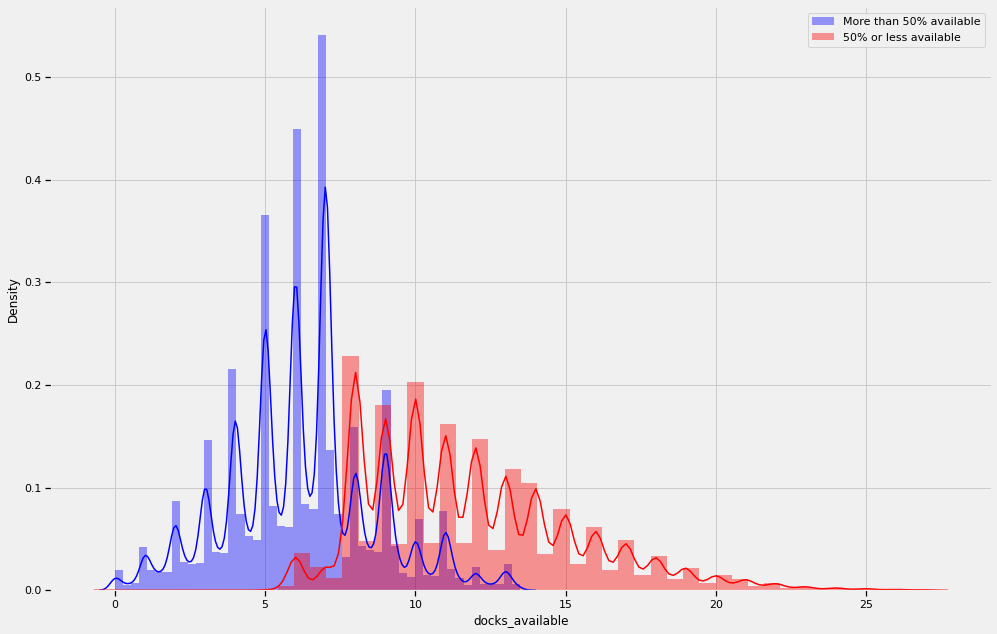

In [23]:
fig, ax = plt.subplots(figsize=(15,10))

sns.distplot(train_df[train_df['50%'] != 1]['docks_available'], color = 'blue', label='More than 50% available', hist=True)
sns.distplot(train_df[train_df['50%'] == 1]['docks_available'], color = 'red', label='50% or less available', hist=True)
plt.legend()

plt.show()

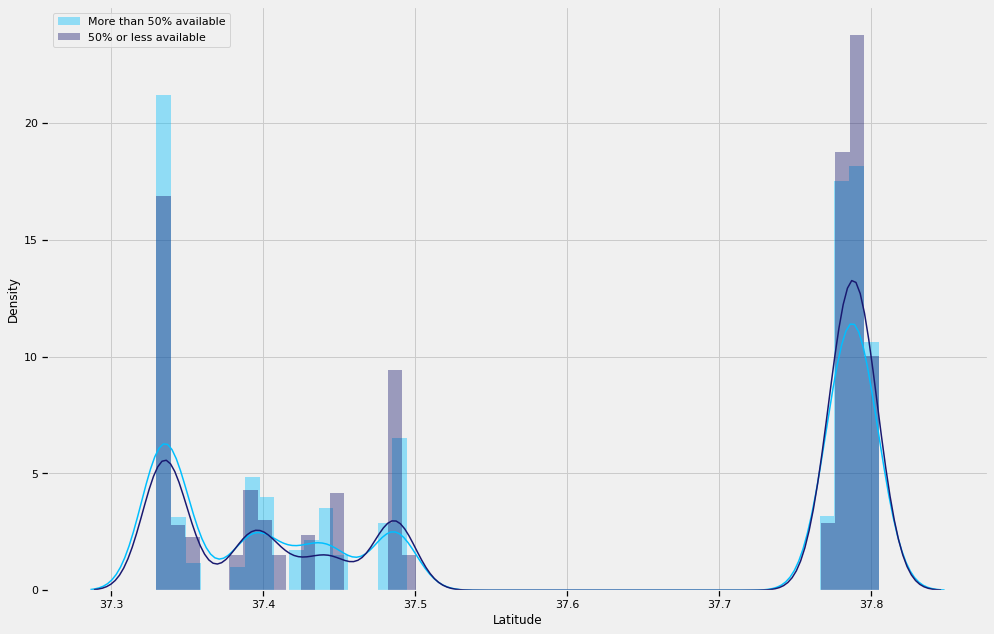

In [24]:
fig, ax = plt.subplots(figsize=(15,10))

sns.distplot(train_df[train_df['50%'] != 1]['Latitude'], color = 'deepskyblue', label='More than 50% available', hist=True)
sns.distplot(train_df[train_df['50%'] == 1]['Latitude'], color = 'midnightblue', label='50% or less available', hist=True)
plt.legend()

plt.show()

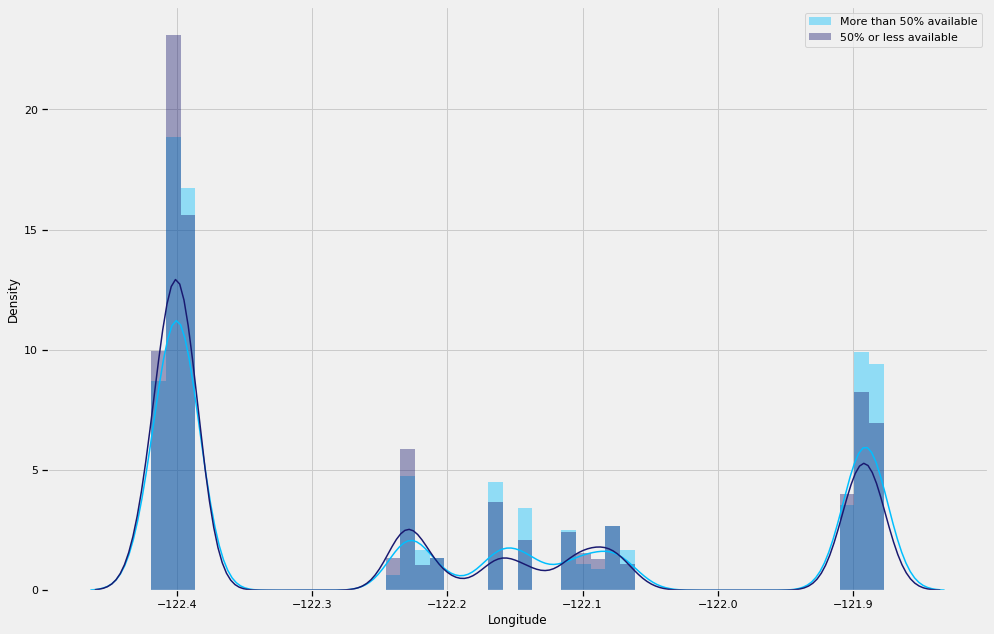

In [25]:
fig, ax = plt.subplots(figsize=(15,10))

sns.distplot(train_df[train_df['50%'] != 1]['Longitude'], color = 'deepskyblue', label='More than 50% available', hist=True)
sns.distplot(train_df[train_df['50%'] == 1]['Longitude'], color = 'midnightblue', label='50% or less available', hist=True)
plt.legend()

plt.show()

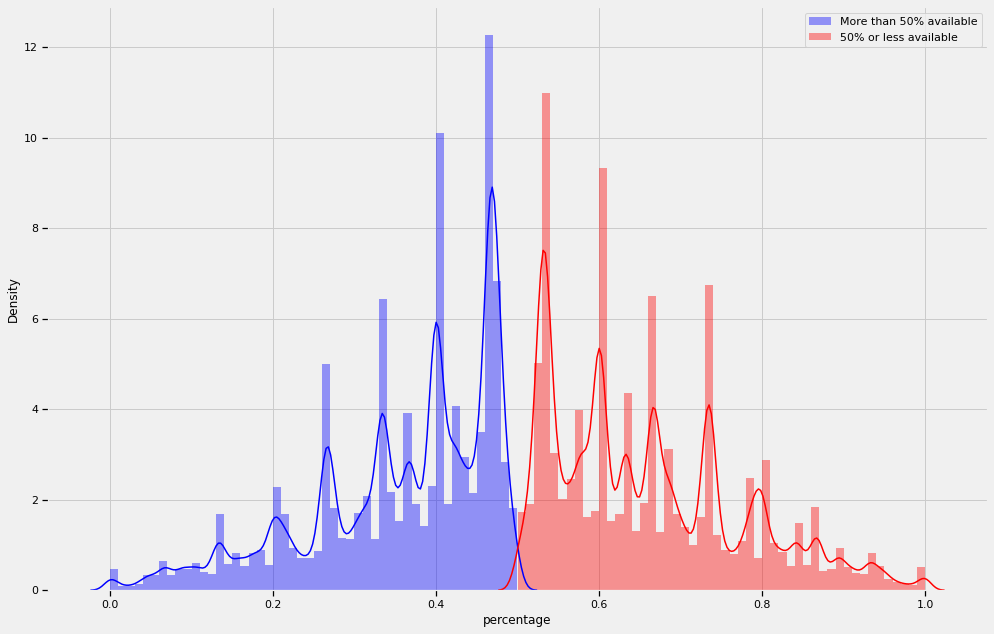

In [26]:
fig, ax = plt.subplots(figsize=(15,10))

sns.distplot(train_df[train_df['50%'] != 1]['percentage'], color = 'blue', label='More than 50% available', hist=True)
sns.distplot(train_df[train_df['50%'] == 1]['percentage'], color = 'red', label='50% or less available', hist=True)
plt.legend()

plt.show()

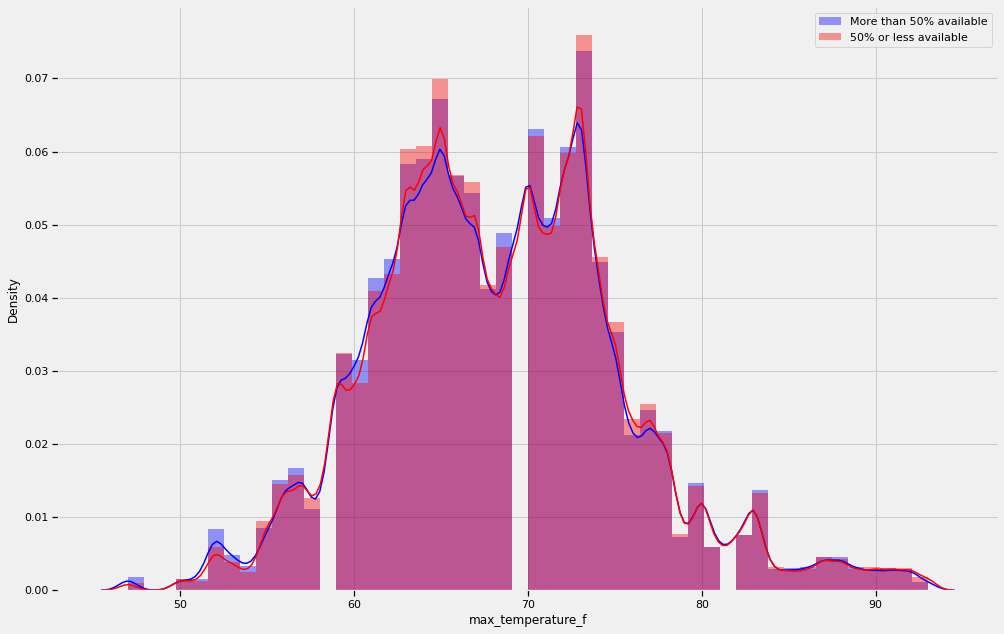

In [27]:
fig, ax = plt.subplots(figsize=(15,10))

sns.distplot(train_df[train_df['50%'] != 1]['max_temperature_f'], color = 'blue', label='More than 50% available', hist=True)
sns.distplot(train_df[train_df['50%'] == 1]['max_temperature_f'], color = 'red', label='50% or less available', hist=True)
plt.legend()

plt.show()

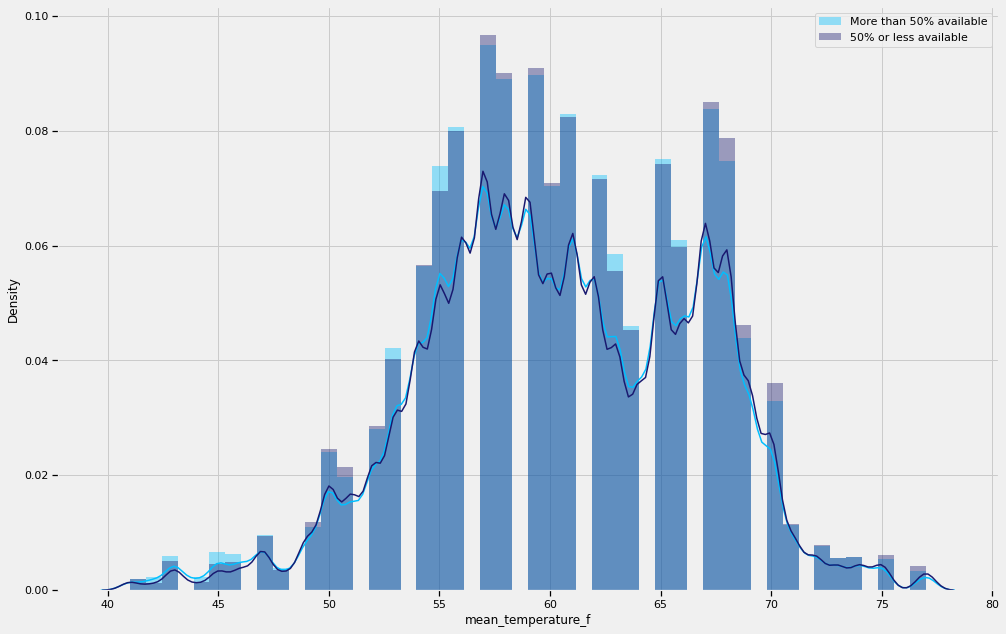

In [28]:
fig, ax = plt.subplots(figsize=(15,10))

sns.distplot(train_df[train_df['50%'] != 1]['mean_temperature_f'], color = 'deepskyblue', label='More than 50% available', hist=True)
sns.distplot(train_df[train_df['50%'] == 1]['mean_temperature_f'], color = 'midnightblue', label='50% or less available', hist=True)
plt.legend()

plt.show()

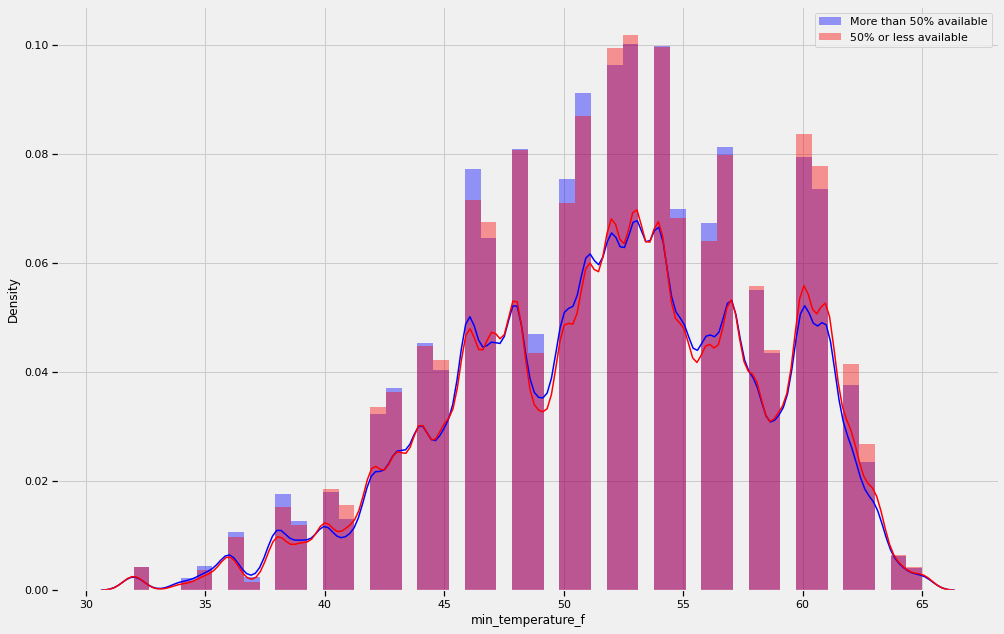

In [29]:
fig, ax = plt.subplots(figsize=(15,10))

sns.distplot(train_df[train_df['50%'] != 1]['min_temperature_f'], color = 'blue', label='More than 50% available', hist=True)
sns.distplot(train_df[train_df['50%'] == 1]['min_temperature_f'], color = 'red', label='50% or less available', hist=True)
plt.legend()

plt.show()

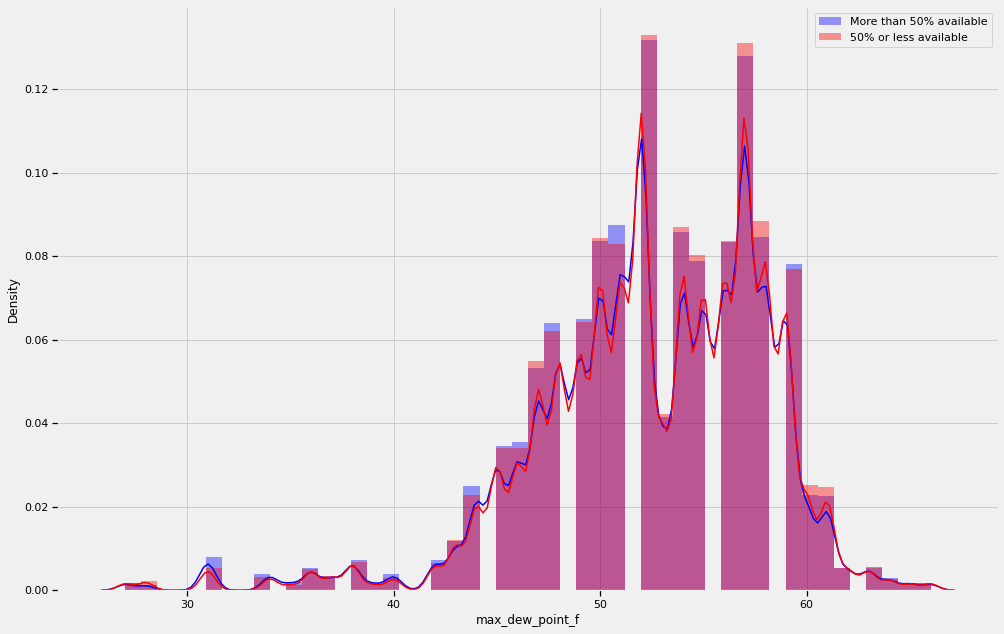

In [30]:
fig, ax = plt.subplots(figsize=(15,10))

sns.distplot(train_df[train_df['50%'] != 1]['max_dew_point_f'], color = 'blue', label='More than 50% available', hist=True)
sns.distplot(train_df[train_df['50%'] == 1]['max_dew_point_f'], color = 'red', label='50% or less available', hist=True)
plt.legend()

plt.show()

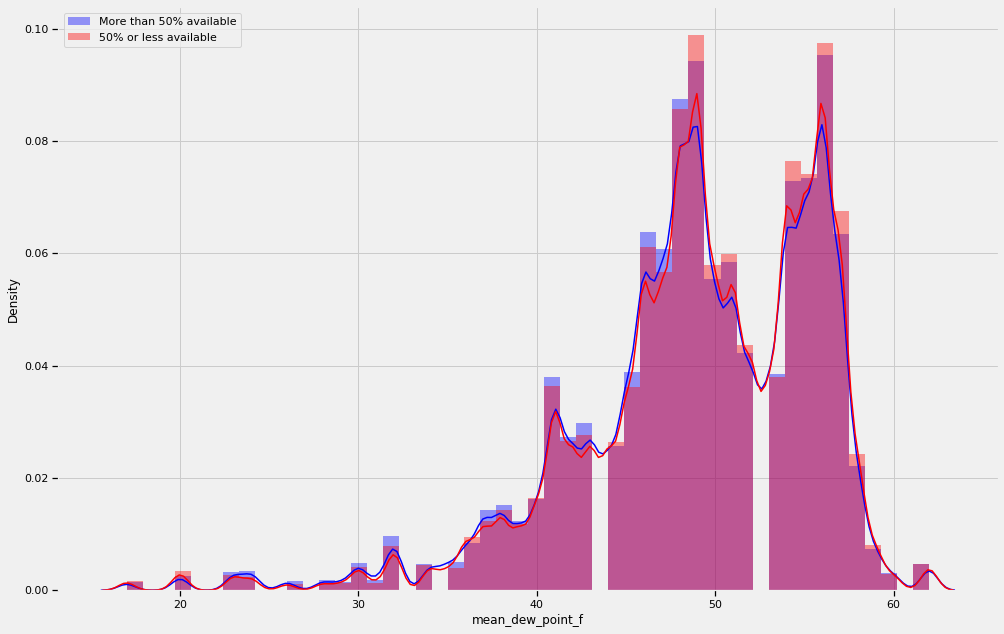

In [31]:
fig, ax = plt.subplots(figsize=(15,10))

sns.distplot(train_df[train_df['50%'] != 1]['mean_dew_point_f'], color = 'blue', label='More than 50% available', hist=True)
sns.distplot(train_df[train_df['50%'] == 1]['mean_dew_point_f'], color = 'red', label='50% or less available', hist=True)
plt.legend()

plt.show()

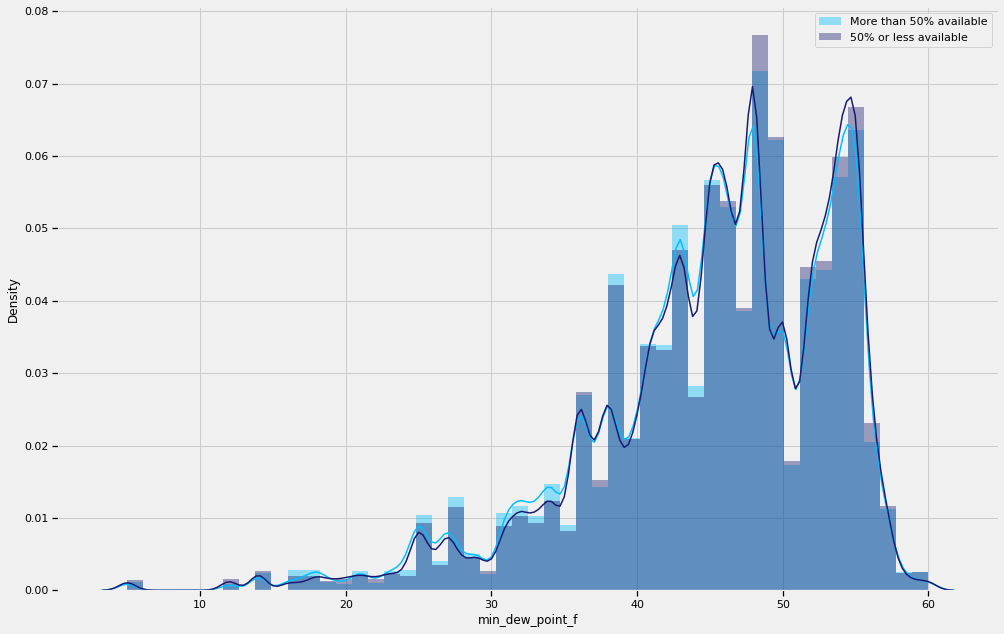

In [32]:
fig, ax = plt.subplots(figsize=(15,10))

sns.distplot(train_df[train_df['50%'] != 1]['min_dew_point_f'], color = 'deepskyblue', label='More than 50% available', hist=True)
sns.distplot(train_df[train_df['50%'] == 1]['min_dew_point_f'], color = 'midnightblue', label='50% or less available', hist=True)
plt.legend()

plt.show()

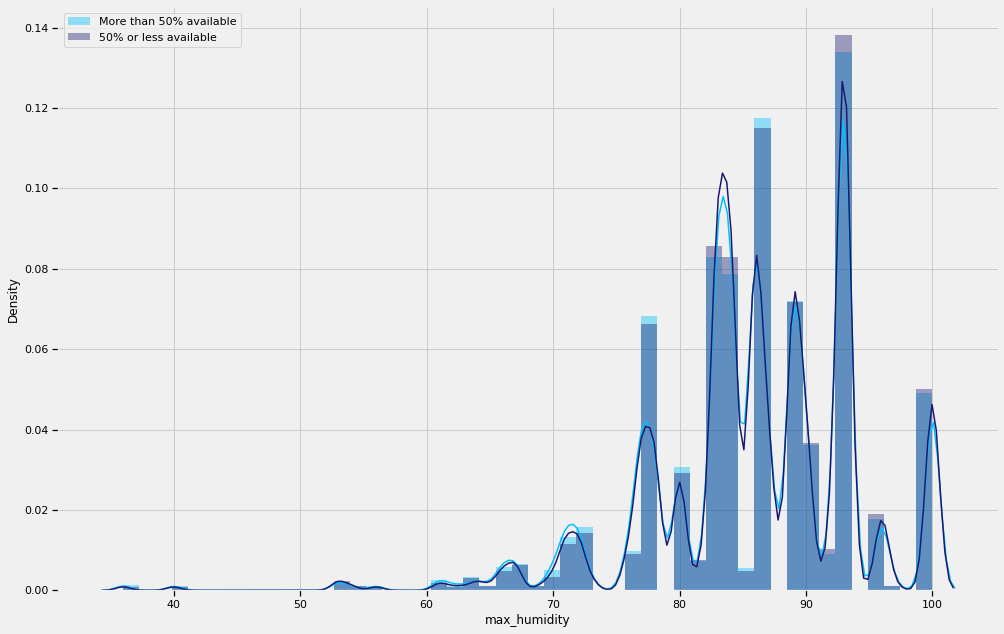

In [33]:
fig, ax = plt.subplots(figsize=(15,10))

sns.distplot(train_df[train_df['50%'] != 1]['max_humidity'], color = 'deepskyblue', label='More than 50% available', hist=True)
sns.distplot(train_df[train_df['50%'] == 1]['max_humidity'], color = 'midnightblue', label='50% or less available', hist=True)
plt.legend()

plt.show()

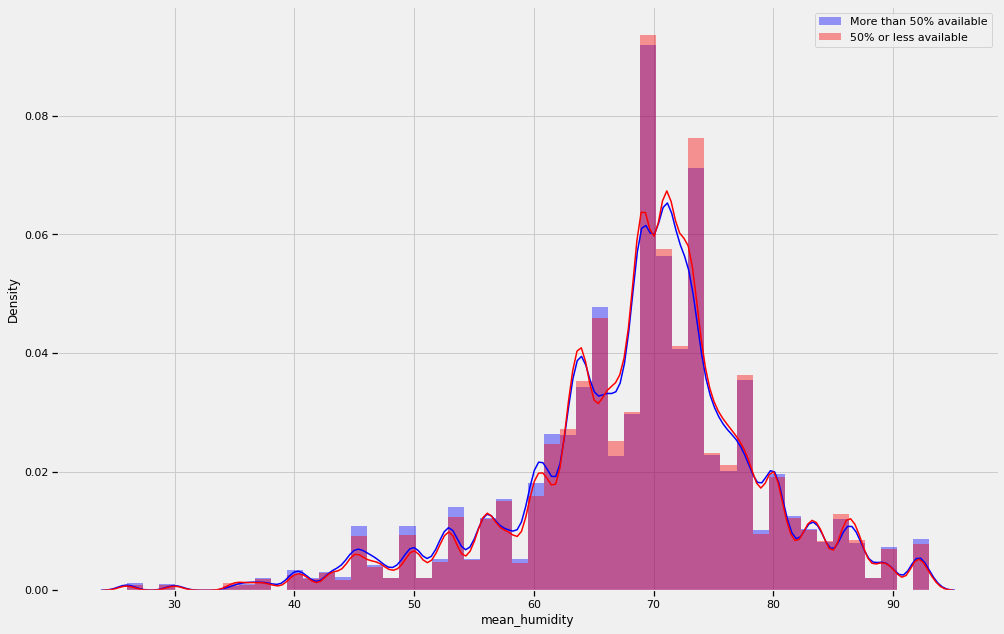

In [34]:
fig, ax = plt.subplots(figsize=(15,10))

sns.distplot(train_df[train_df['50%'] != 1]['mean_humidity'], color = 'blue', label='More than 50% available', hist=True)
sns.distplot(train_df[train_df['50%'] == 1]['mean_humidity'], color = 'red', label='50% or less available', hist=True)
plt.legend()

plt.show()

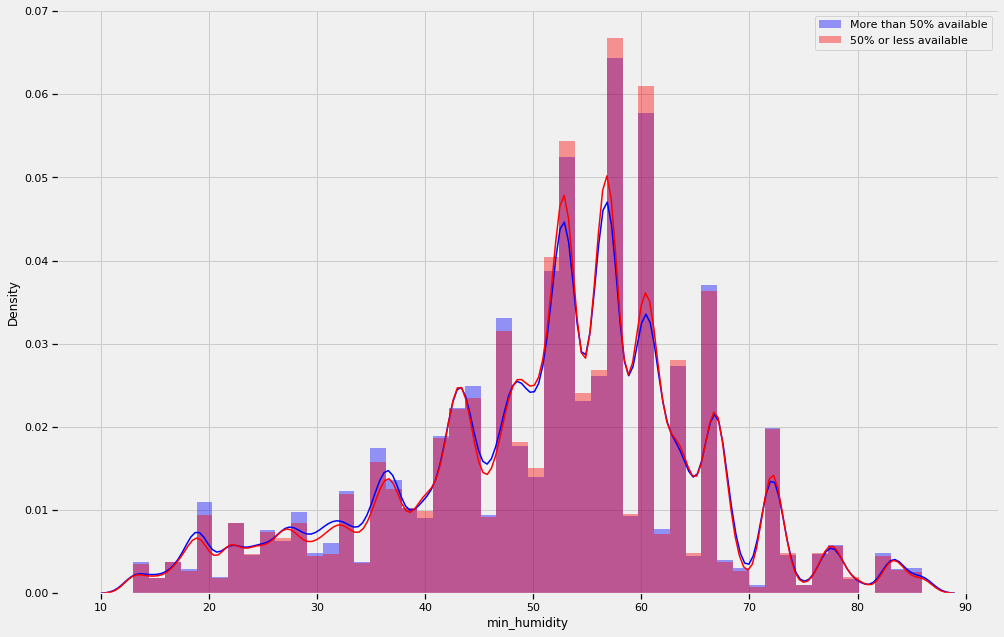

In [35]:
fig, ax = plt.subplots(figsize=(15,10))

sns.distplot(train_df[train_df['50%'] != 1]['min_humidity'], color = 'blue', label='More than 50% available', hist=True)
sns.distplot(train_df[train_df['50%'] == 1]['min_humidity'], color = 'red', label='50% or less available', hist=True)
plt.legend()

plt.show()

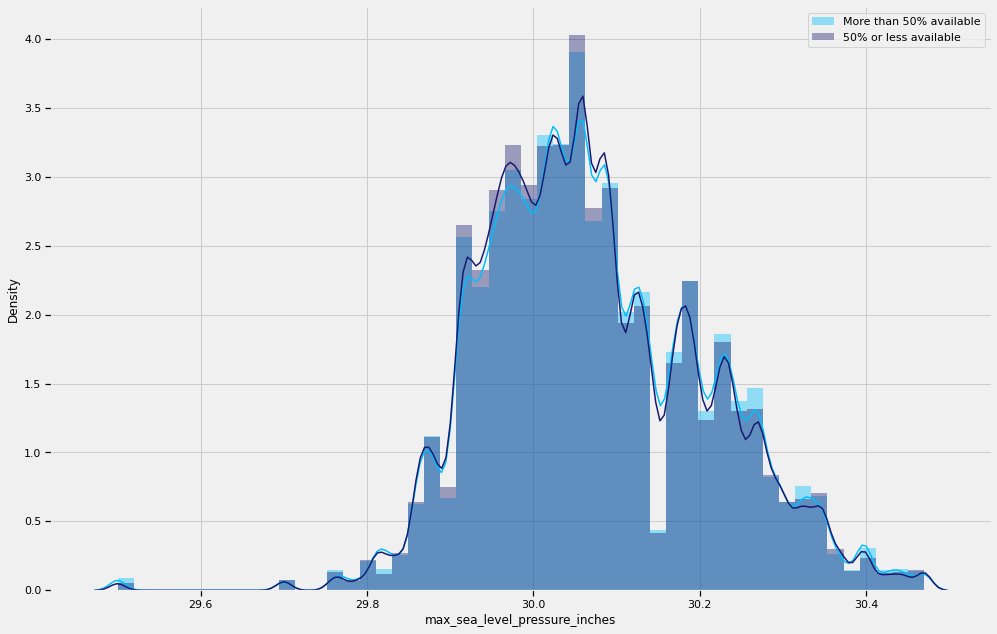

In [36]:
fig, ax = plt.subplots(figsize=(15,10))

sns.distplot(train_df[train_df['50%'] != 1]['max_sea_level_pressure_inches'], color = 'deepskyblue', label='More than 50% available', hist=True)
sns.distplot(train_df[train_df['50%'] == 1]['max_sea_level_pressure_inches'], color = 'midnightblue', label='50% or less available', hist=True)
plt.legend()

plt.show()

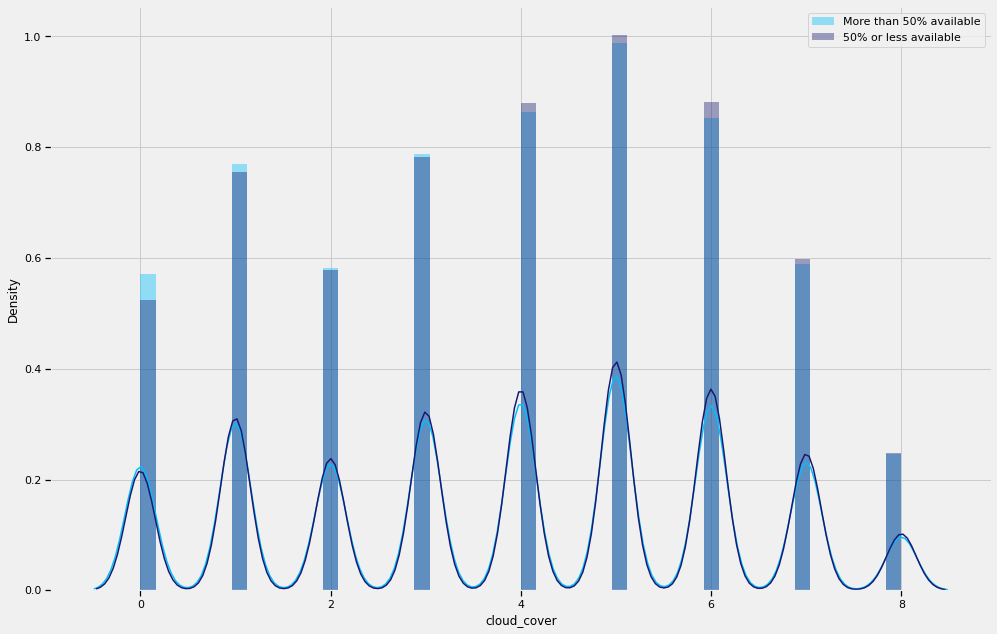

In [37]:
fig, ax = plt.subplots(figsize=(15,10))

sns.distplot(train_df[train_df['50%'] != 1]['cloud_cover'], color = 'deepskyblue', label='More than 50% available', hist=True)
sns.distplot(train_df[train_df['50%'] == 1]['cloud_cover'], color = 'midnightblue', label='50% or less available', hist=True)
plt.legend()

plt.show()

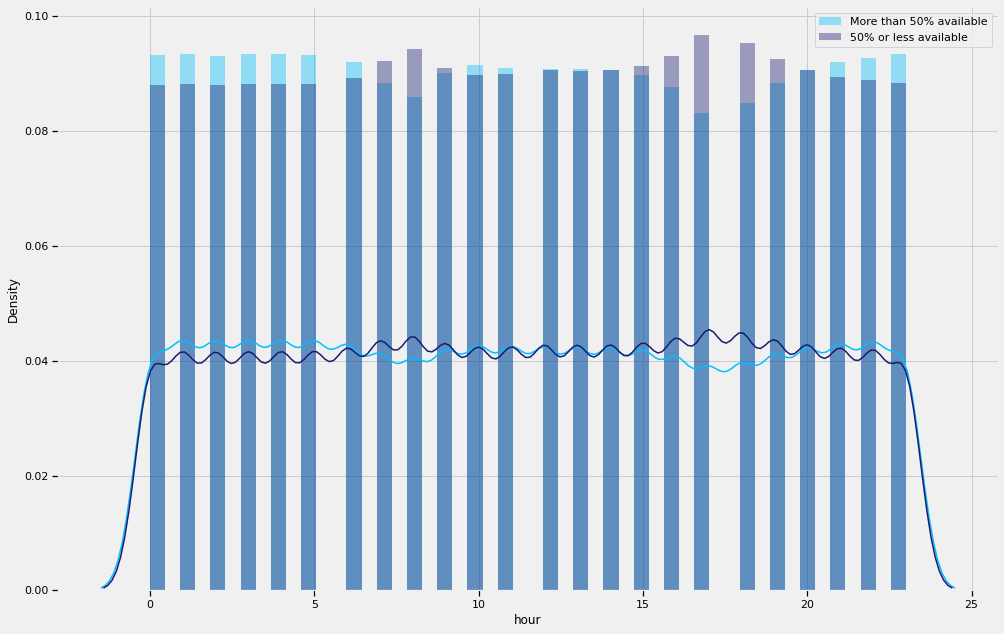

In [38]:
fig, ax = plt.subplots(figsize=(15,10))

sns.distplot(train_df[train_df['50%'] != 1]['hour'], color = 'deepskyblue', label='More than 50% available', hist=True)
sns.distplot(train_df[train_df['50%'] == 1]['hour'], color = 'midnightblue', label='50% or less available', hist=True)
plt.legend()

plt.show()

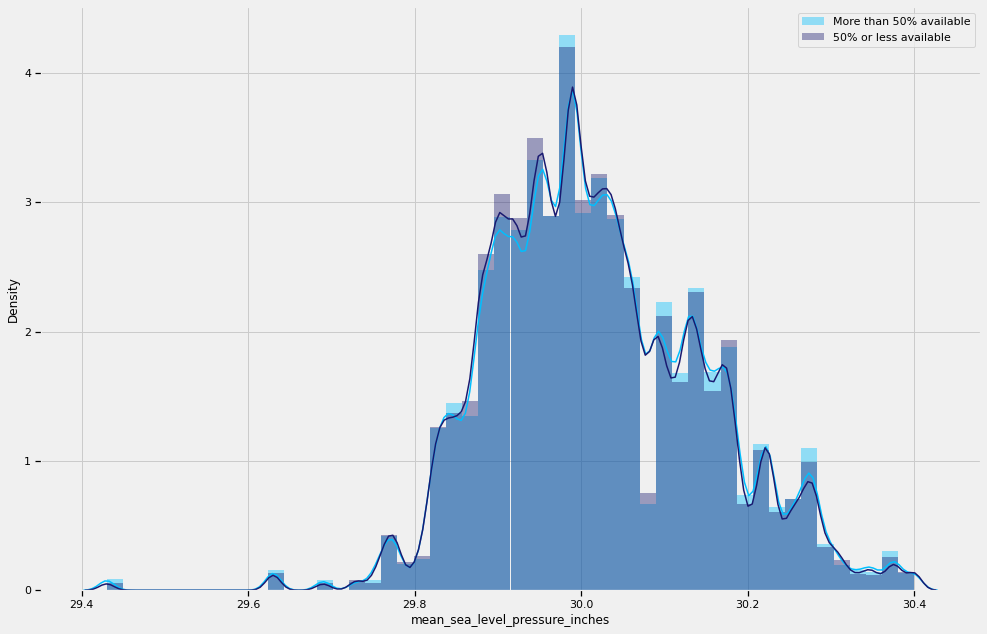

In [39]:
fig, ax = plt.subplots(figsize=(15,10))

sns.distplot(train_df[train_df['50%'] != 1]['mean_sea_level_pressure_inches'], color = 'deepskyblue', label='More than 50% available', hist=True)
sns.distplot(train_df[train_df['50%'] == 1]['mean_sea_level_pressure_inches'], color = 'midnightblue', label='50% or less available', hist=True)
plt.legend()

plt.show()

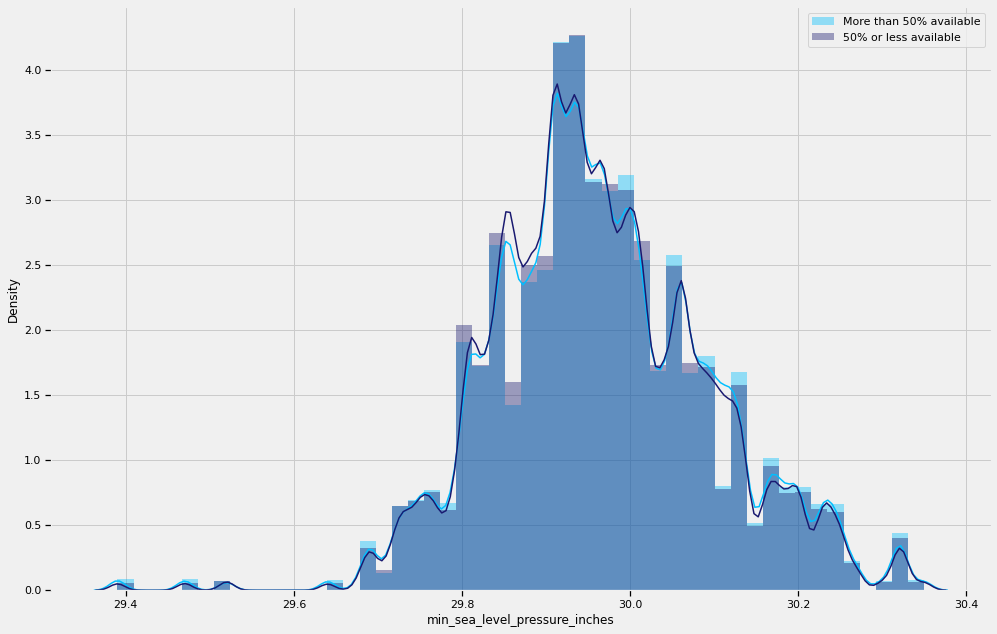

In [40]:
fig, ax = plt.subplots(figsize=(15,10))

sns.distplot(train_df[train_df['50%'] != 1]['min_sea_level_pressure_inches'], color = 'deepskyblue', label='More than 50% available', hist=True)
sns.distplot(train_df[train_df['50%'] == 1]['min_sea_level_pressure_inches'], color = 'midnightblue', label='50% or less available', hist=True)
plt.legend()

plt.show()

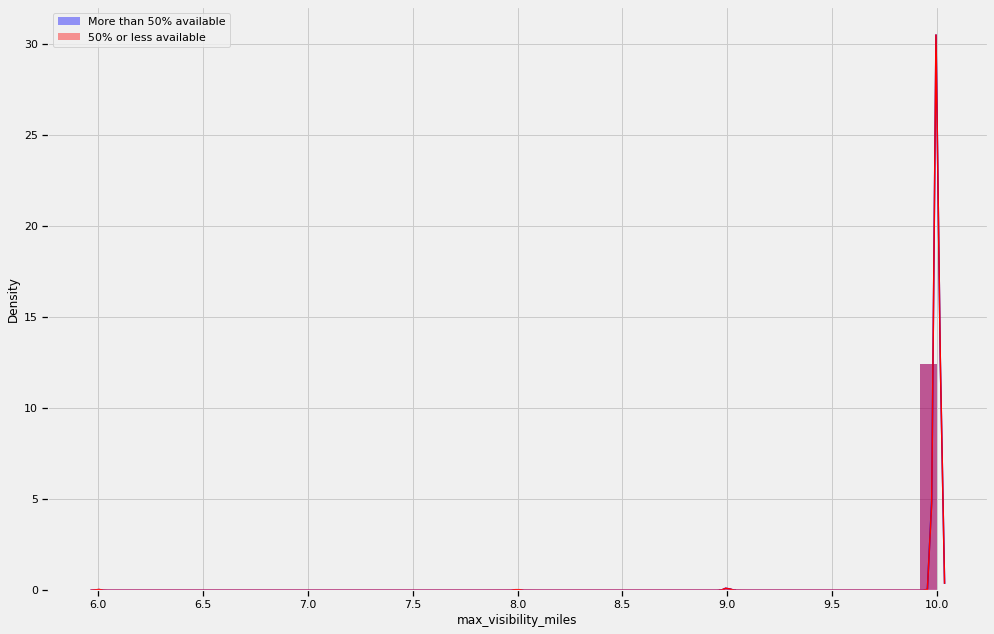

In [41]:
fig, ax = plt.subplots(figsize=(15,10))

sns.distplot(train_df[train_df['50%'] != 1]['max_visibility_miles'], color = 'blue', label='More than 50% available', hist=True)
sns.distplot(train_df[train_df['50%'] == 1]['max_visibility_miles'], color = 'red', label='50% or less available', hist=True)
plt.legend()

plt.show()

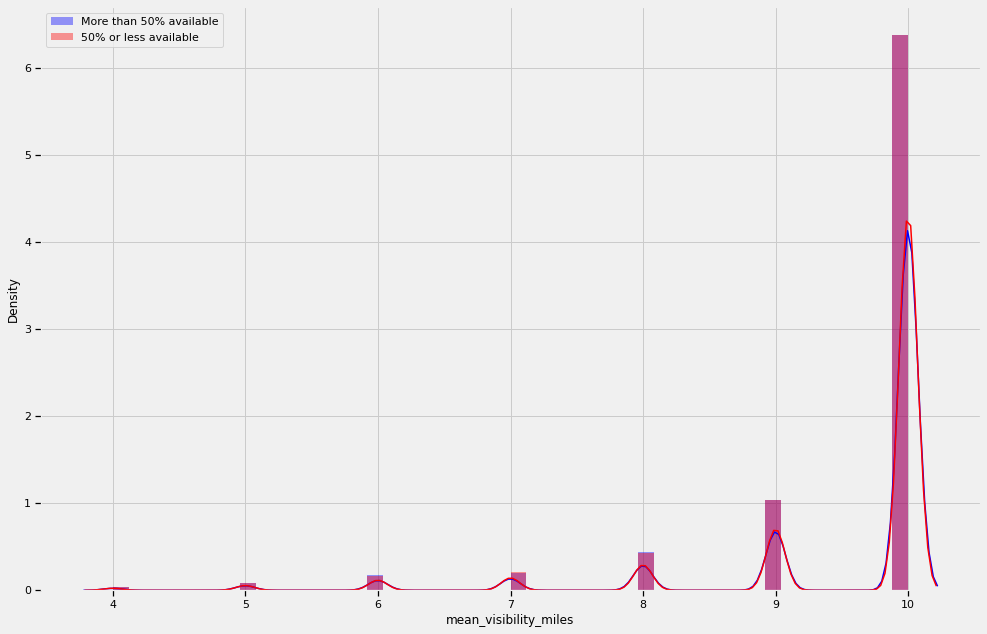

In [42]:
fig, ax = plt.subplots(figsize=(15,10))

sns.distplot(train_df[train_df['50%'] != 1]['mean_visibility_miles'], color = 'blue', label='More than 50% available', hist=True)
sns.distplot(train_df[train_df['50%'] == 1]['mean_visibility_miles'], color = 'red', label='50% or less available', hist=True)
plt.legend()

plt.show()

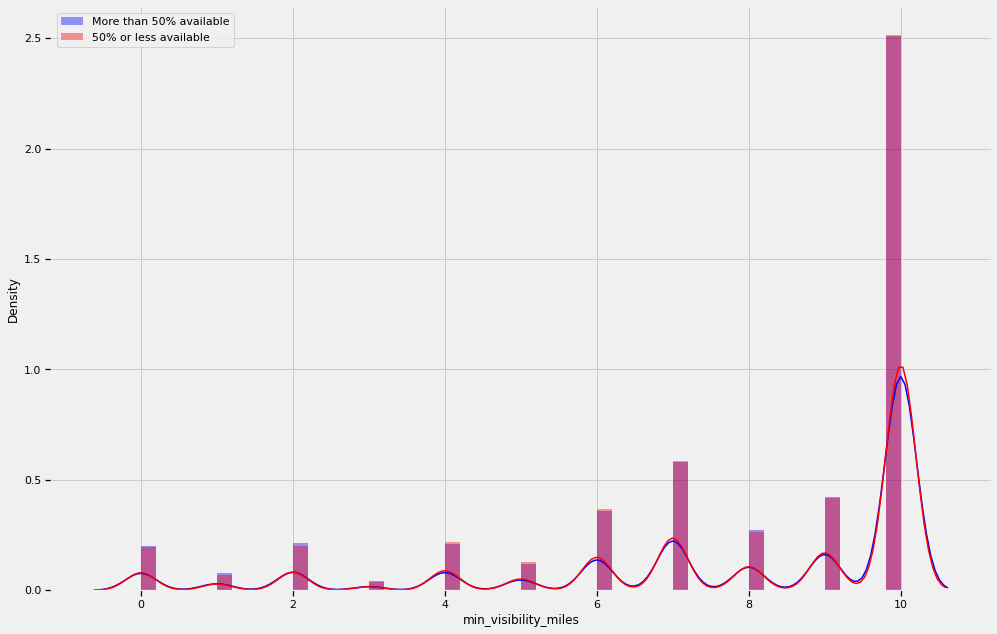

In [43]:
fig, ax = plt.subplots(figsize=(15,10))

sns.distplot(train_df[train_df['50%'] != 1]['min_visibility_miles'], color = 'blue', label='More than 50% available', hist=True)
sns.distplot(train_df[train_df['50%'] == 1]['min_visibility_miles'], color = 'red', label='50% or less available', hist=True)
plt.legend()

plt.show()

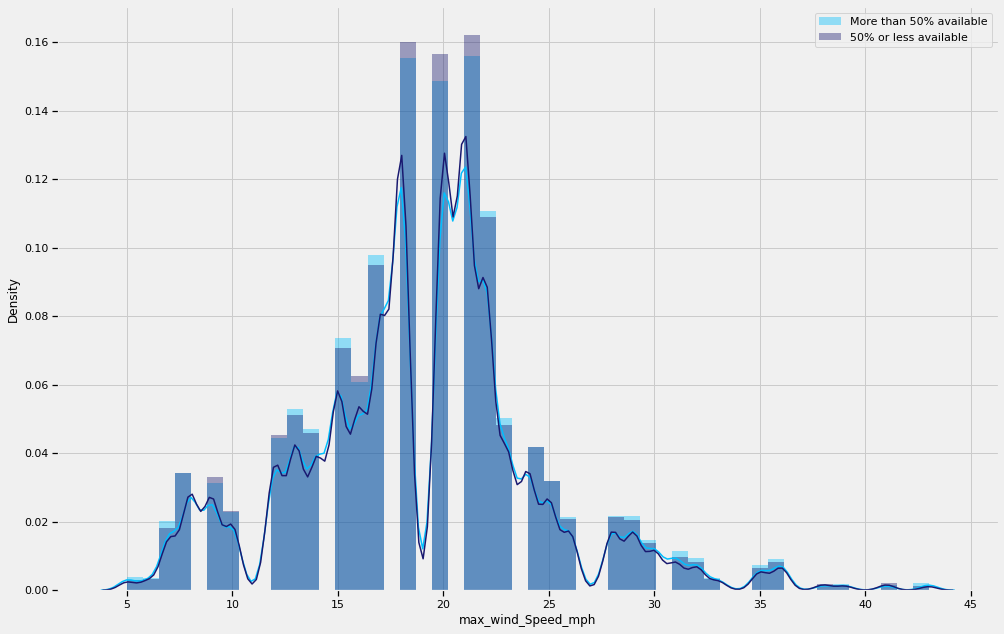

In [44]:
fig, ax = plt.subplots(figsize=(15,10))

sns.distplot(train_df[train_df['50%'] != 1]['max_wind_Speed_mph'], color = 'deepskyblue', label='More than 50% available', hist=True)
sns.distplot(train_df[train_df['50%'] == 1]['max_wind_Speed_mph'], color = 'midnightblue', label='50% or less available', hist=True)
plt.legend()

plt.show()

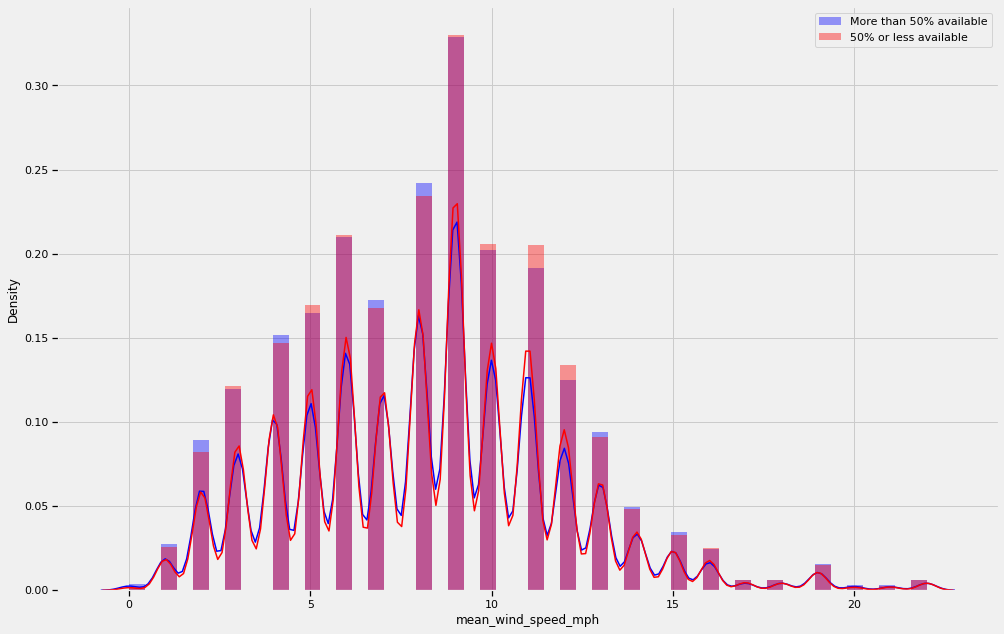

In [45]:
fig, ax = plt.subplots(figsize=(15,10))

sns.distplot(train_df[train_df['50%'] != 1]['mean_wind_speed_mph'], color = 'blue', label='More than 50% available', hist=True)
sns.distplot(train_df[train_df['50%'] == 1]['mean_wind_speed_mph'], color = 'red', label='50% or less available', hist=True)
plt.legend()

plt.show()

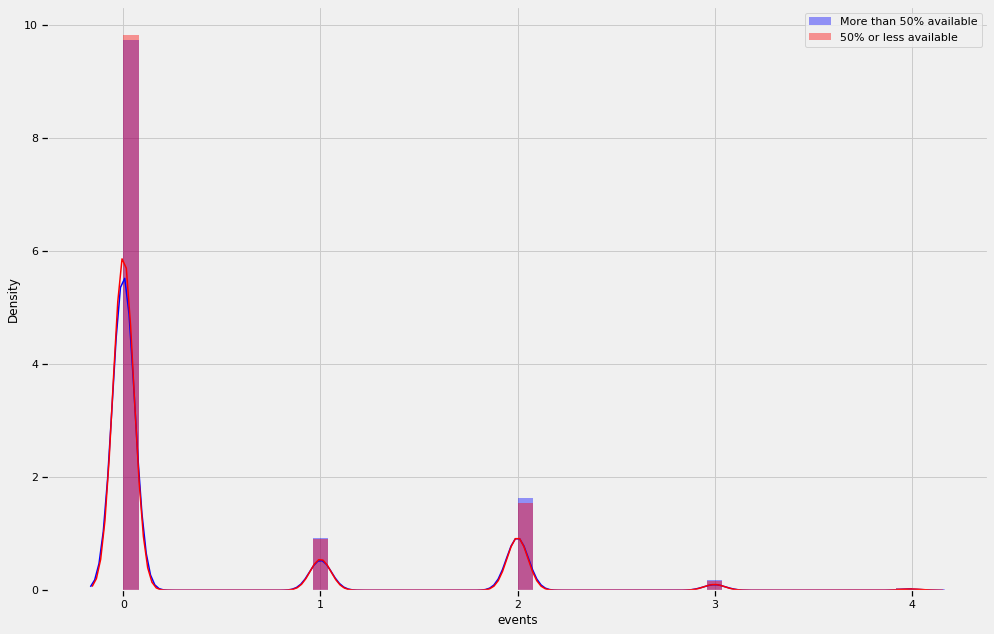

In [46]:
fig, ax = plt.subplots(figsize=(15,10))

sns.distplot(train_df[train_df['50%'] != 1]['events'], color = 'blue', label='More than 50% available', hist=True)
sns.distplot(train_df[train_df['50%'] == 1]['events'], color = 'red', label='50% or less available', hist=True)
plt.legend()

plt.show()

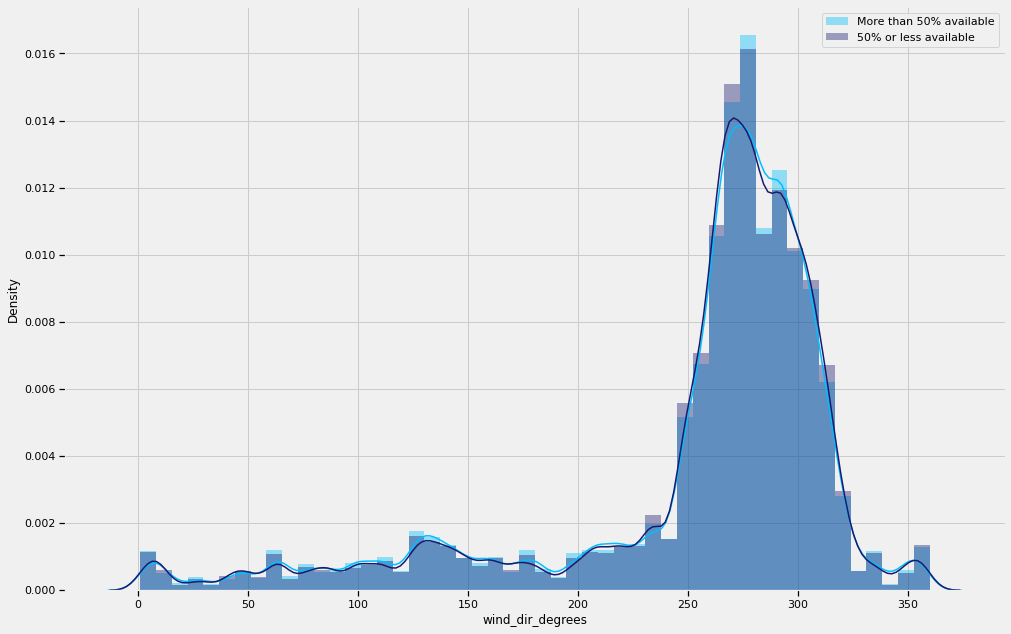

In [47]:
fig, ax = plt.subplots(figsize=(15,10))

sns.distplot(train_df[train_df['50%'] != 1]['wind_dir_degrees'], color = 'deepskyblue', label='More than 50% available', hist=True)
sns.distplot(train_df[train_df['50%'] == 1]['wind_dir_degrees'], color = 'midnightblue', label='50% or less available', hist=True)
plt.legend()

plt.show()

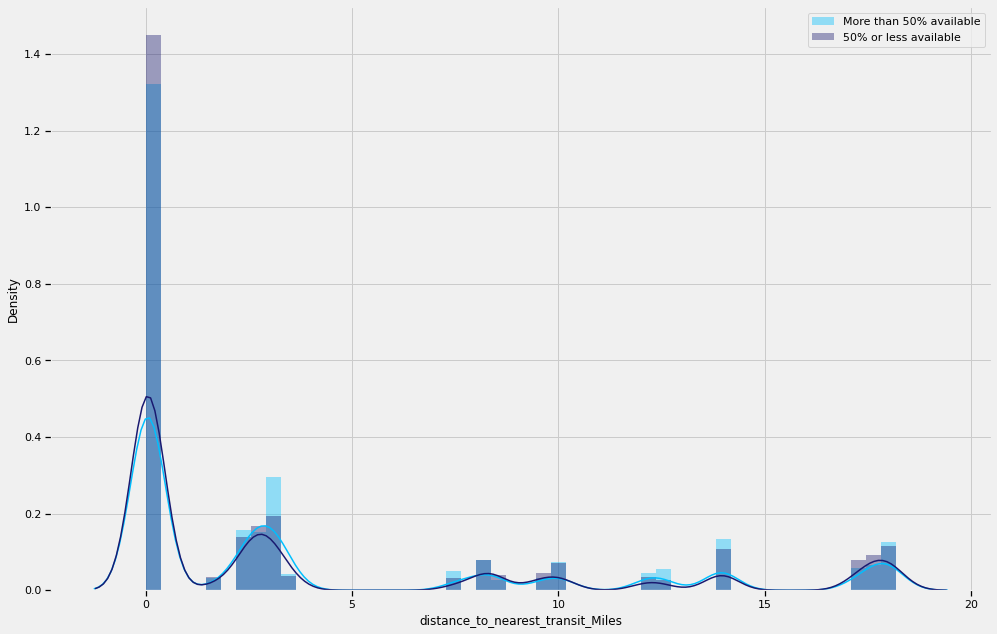

In [48]:
fig, ax = plt.subplots(figsize=(15,10))

sns.distplot(train_df[train_df['50%'] != 1]['distance_to_nearest_transit_Miles'], color = 'deepskyblue', label='More than 50% available', hist=True)
sns.distplot(train_df[train_df['50%'] == 1]['distance_to_nearest_transit_Miles'], color = 'midnightblue', label='50% or less available', hist=True)
plt.legend()

plt.show()

In [49]:
#Calculate Mean and Median of the nearest transit (Miles) to display on graph
print(train_df["distance_to_nearest_transit_Miles"].mean())
print(train_df["distance_to_nearest_transit_Miles"].median())

4.2258402077105375
0.1935685147605213


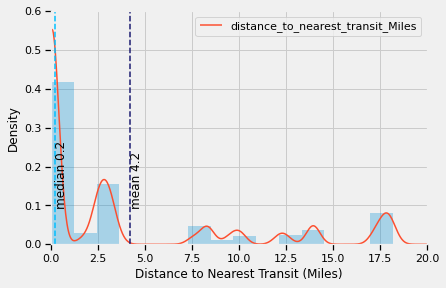

In [50]:
#Does not view the outliers
#Plot distance to the nearest transit mile mediam and min for further visualization
ax = train_df["distance_to_nearest_transit_Miles"].hist(bins=15, density=True, stacked=True, alpha=0.3)
train_df["distance_to_nearest_transit_Miles"].plot(kind='density')

ax.set(xlabel="Distance to Nearest Transit (Miles)")
plt.axvline(x=train_df["distance_to_nearest_transit_Miles"].mean(), color = 'midnightblue', ls='--')
plt.axvline(x=train_df["distance_to_nearest_transit_Miles"].median(), color = 'deepskyblue', ls='--')
plt.text(4.2,0.1,'mean {}'.format(round(train_df["distance_to_nearest_transit_Miles"].mean(),1)),rotation=90)
plt.text(0.19,0.1,'median {}'.format(round(train_df["distance_to_nearest_transit_Miles"].median(),1)),rotation=90)


plt.legend()
plt.xlim(0,20)
plt.ylim(0,0.6)
plt.show()

# Geospatial Analysis

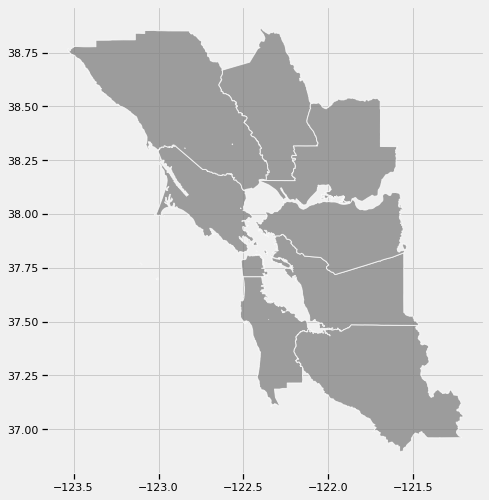

In [51]:
#Visualisation of Bay Area
neighbourhoods = gpd.read_file('bay_area_counties.geojson')

# View GeoDataFrame
neighbourhoods.head()

neighbourhoods.plot(figsize=(15, 8), color='gray', edgecolor='w', alpha=0.75);


In [52]:
# Define the geometry for the GeoDataFrame
geometry = gpd.points_from_xy(train_df['Longitude'], train_df['Latitude'])

# Convert the DataFrame to a GeoDataFrame
bikeshare_stations_gdf = gpd.GeoDataFrame(train_df, geometry=geometry)

# View DataFrame
bikeshare_stations_gdf.head()

,time,bikes_available,docks_available,distance_to_nearest_transit_Miles,Latitude,Longitude,merge_time,index,max_temperature_f,mean_temperature_f,...,mean_wind_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code,percentage,50%,hour,geometry
bike_station_name,,,,,,,,,,,,,,,,,,,,,
2nd at Folsom,2013-08-29 12:00:00,9.500000,9.500000,0.031746,37.785299,-122.396236,2013-08-29,0,74.0,68.0,...,11.0,0.0,4.0,0,286.0,94107,0.500000,1.0,12,POINT (-122.39624 37.78530)
2nd at Folsom,2013-08-29 13:00:00,9.264151,9.735849,0.031746,37.785299,-122.396236,2013-08-29,0,74.0,68.0,...,11.0,0.0,4.0,0,286.0,94107,0.512413,1.0,13,POINT (-122.39624 37.78530)
2nd at Folsom,2013-08-29 14:00:00,9.928571,9.071429,0.031746,37.785299,-122.396236,2013-08-29,0,74.0,68.0,...,11.0,0.0,4.0,0,286.0,94107,0.477444,0.0,14,POINT (-122.39624 37.78530)
2nd at Folsom,2013-08-29 15:00:00,10.055556,8.944444,0.031746,37.785299,-122.396236,2013-08-29,0,74.0,68.0,...,11.0,0.0,4.0,0,286.0,94107,0.470760,0.0,15,POINT (-122.39624 37.78530)
2nd at Folsom,2013-08-29 16:00:00,10.000000,9.000000,0.031746,37.785299,-122.396236,2013-08-29,0,74.0,68.0,...,11.0,0.0,4.0,0,286.0,94107,0.473684,0.0,16,POINT (-122.39624 37.78530)


In [53]:
# Convert the DataFrame to a GeoDataFrame
bike_lanes = gpd.read_file('bay_area_bikeways.geojson')

# View DataFrame
bike_lanes.head()

,objectid,id,project_na,county,corridor,endpoint_a,endpoint_b,status,len_mile,SHAPE_Length,geometry
0,759,ALA-1,Bay Trail - Northern Alameda County,Alameda,Eastshore-North,Contra Costa County line,Breakwater Ave/Hwy 92,Existing,29.253034,0.468146,"MULTILINESTRING ((-122.18668 37.69578, -122.18..."
1,760,ALA-1,Bay Trail - Northern Alameda County,Alameda,Eastshore-South,Contra Costa County line,Breakwater Ave/Hwy 92,Existing,0.984560,0.015924,"MULTILINESTRING ((-122.18910 37.70108, -122.18..."
2,761,ALA-1,Bay Trail - Northern Alameda County,Alameda,Eastshore-South,Contra Costa County line,Breakwater Ave/Hwy 92,Unbuilt,2.943572,0.048775,"MULTILINESTRING ((-122.21083 37.75273, -122.21..."
3,762,ALA-10,Davis - Estudillo - Crow Canyon Road,Alameda,Eastshore-South,Bay Trail/Davis St.,Contra Costa County line,Existing,2.865945,0.051339,"MULTILINESTRING ((-122.07411 37.70471, -122.07..."
4,763,ALA-10,Davis - Estudillo - Crow Canyon Road,Alameda,Eastshore-South,Bay Trail/Davis St.,Contra Costa County line,Unbuilt,12.687981,0.208595,"MULTILINESTRING ((-122.05345 37.70220, -122.05..."


In [54]:
transit_stops = pd.read_csv('transit_stops.csv')
transit_stops.head()

,Address,Latitude,Longitude,geometry
0,Santa Clara Transit Center,37.35305,-121.93667,POINT (-121.93667 37.35305)
1,San Jose Airport Terminal A,37.35305,-121.93667,POINT (-121.93667 37.35305)
2,San Jose Airport Terminal B,37.35305,-121.93667,POINT (-121.93667 37.35305)
3,1st & Metro @ Metro Station,37.35305,-121.93667,POINT (-121.93667 37.35305)
4,El Camino & Lafayette,37.35305,-121.93667,POINT (-121.93667 37.35305)


In [55]:
muni_stops = pd.read_csv('muni_stops.csv')
muni_stops.head()

,Address,Latitude,Longitude,geometry
0,Powell St&Francisco St SE-NS/BZ,37.804810,-122.411650,POINT (-122.41165 37.80481)
1,Chestnut St&Laguna St SW-NS/BZ,37.801370,-122.431406,POINT (-122.431406 37.80137)
2,Geary Blvd&Fillmore St NW-FS/BZ,37.784391,-122.433050,POINT (-122.43305 37.784391)
3,3rd St&Folsom St N-FS/BZ,37.784204,-122.399326,POINT (-122.399326 37.784204)
4,Presidio Ave&Sutter St NE-FS/PS,37.784535,-122.446197,POINT (-122.446197 37.784535)


In [56]:
from shapely import wkt

transit_stops['geometry'] = transit_stops['geometry'].apply(wkt.loads)
transit_stops_gdf = gpd.GeoDataFrame(transit_stops, crs='epsg:4228')

In [57]:
from shapely import wkt

muni_stops['geometry'] = muni_stops['geometry'].apply(wkt.loads)
muni_stops_gdf = gpd.GeoDataFrame(muni_stops, crs='epsg:4228')

In [58]:
neighbourhoods.geometry.head(1)

0    MULTIPOLYGON (((-122.21496 37.76113, -122.2156...
Name: geometry, dtype: geometry

In [59]:
neighbourhoods.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [60]:
bikeshare_stations_gdf.geometry.head(1)

bike_station_name
2nd at Folsom    POINT (-122.39624 37.78530)
Name: geometry, dtype: geometry

In [61]:
bikeshare_stations_gdf.crs

In [62]:
bike_lanes.geometry.head(1)

0    MULTILINESTRING ((-122.18668 37.69578, -122.18...
Name: geometry, dtype: geometry

In [63]:
bike_lanes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

**The EPSG for the San Francisco Bay Area is 4228.**

In [64]:
# Transform all datasets to EPSG:4228
bike_lanes.to_crs(epsg=4228, inplace = True)

bike_lanes.crs

<Geographic 2D CRS: EPSG:4228>
Name: Douala
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree minute second hemisphere)
- Long[east]: Geodetic longitude (degree minute second hemisphere)
Area of Use:
- name: Cameroon - onshore and offshore.
- bounds: (8.32, 1.65, 16.21, 13.09)
Datum: Douala
- Ellipsoid: Clarke 1880 (IGN)
- Prime Meridian: Greenwich

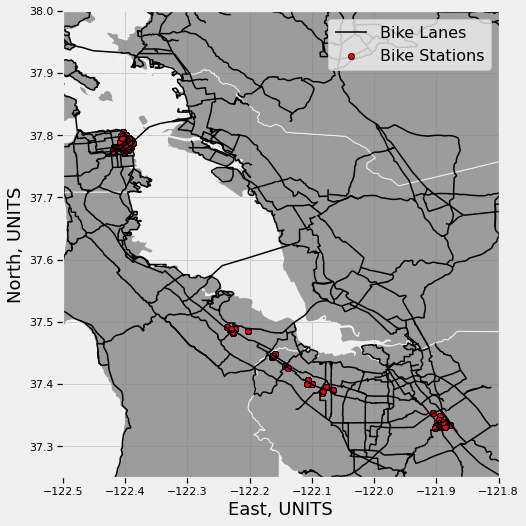

In [65]:
# Plot all three GeoDataFrame together
ax = neighbourhoods.plot(figsize=(15, 8), color='gray', edgecolor='w', alpha=0.75)
bike_lanes.plot(ax=ax, color='black', label = 'Bike Lanes')
bikeshare_stations_gdf.plot(ax=ax, color='red', edgecolor='k', label = 'Bike Stations')

plt.legend(fontsize=16,loc='upper right')
plt.xlabel('East, UNITS', fontsize=18)
plt.ylabel('North, UNITS', fontsize=18)
plt.xlim(-122.5,-121.8)
plt.ylim(37.25,38)
plt.show()

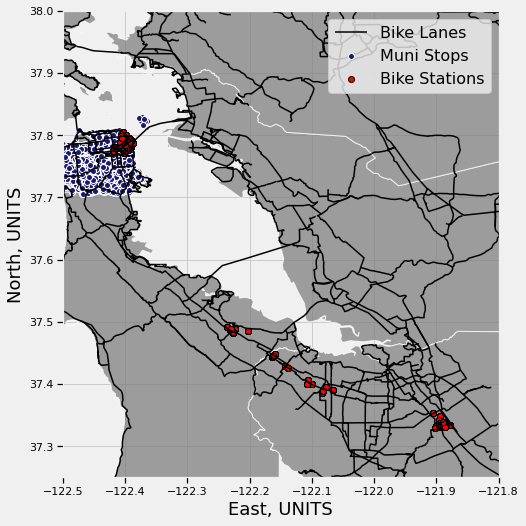

In [66]:
# Plot all three GeoDataFrame together
ax = neighbourhoods.plot(figsize=(15, 8), color='gray', edgecolor='w', alpha=0.75)
bike_lanes.plot(ax=ax, color='black', label = 'Bike Lanes')
muni_stops_gdf.plot(ax=ax, color='midnightblue',edgecolor='w', label = 'Muni Stops')
bikeshare_stations_gdf.plot(ax=ax, color='red', edgecolor='k', label = 'Bike Stations')

plt.legend(fontsize=16,loc='upper right')
plt.xlabel('East, UNITS', fontsize=18)
plt.ylabel('North, UNITS', fontsize=18)
plt.xlim(-122.5,-121.8)
plt.ylim(37.25,38)
plt.show()

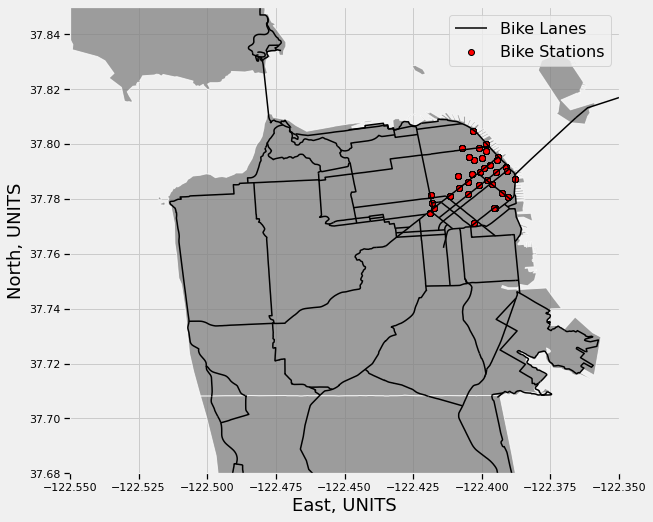

In [67]:
# Plot 2 GeoDataFrame together
ax = neighbourhoods.plot(figsize=(15, 8), color='gray', edgecolor='w', alpha=0.75)
bike_lanes.plot(ax=ax, color='black', label = 'Bike Lanes')
bikeshare_stations_gdf.plot(ax=ax, color='red', edgecolor='k', label = 'Bike Stations')

plt.legend(fontsize=16,loc='upper right')
plt.xlabel('East, UNITS', fontsize=18)
plt.ylabel('North, UNITS', fontsize=18)
plt.xlim(-122.55,-122.35)
plt.ylim(37.68,37.85)
plt.show()

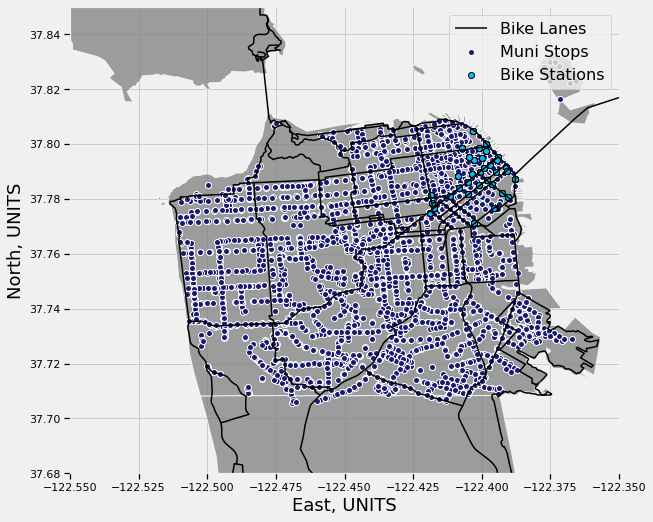

In [68]:
# Plot all three GeoDataFrame together
ax = neighbourhoods.plot(figsize=(15, 8), color='gray', edgecolor='w', alpha=0.75)
bike_lanes.plot(ax=ax, color='black', label = 'Bike Lanes')
muni_stops_gdf.plot(ax=ax, color='midnightblue',edgecolor='w', label = 'Muni Stops')
bikeshare_stations_gdf.plot(ax=ax, color='deepskyblue', edgecolor='k', label = 'Bike Stations')

plt.legend(fontsize=16,loc='upper right')
plt.xlabel('East, UNITS', fontsize=18)
plt.ylabel('North, UNITS', fontsize=18)
plt.xlim(-122.55,-122.35)
plt.ylim(37.68,37.85)
plt.show()


KeyboardInterrupt



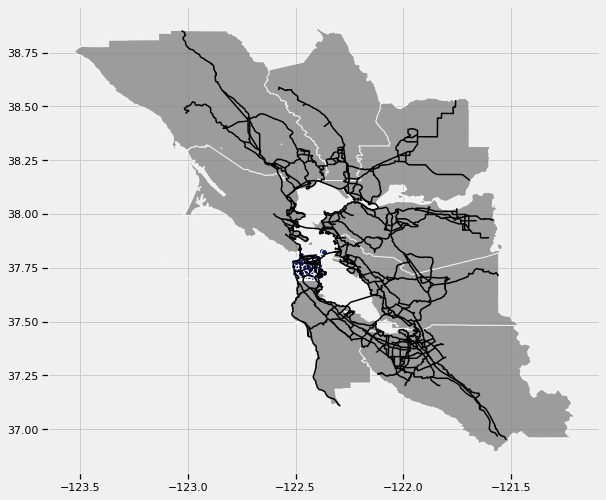

In [69]:
# Plot all three GeoDataFrame together
ax = neighbourhoods.plot(figsize=(15, 8), color='gray', edgecolor='w', alpha=0.75)
bike_lanes.plot(ax=ax, color='black', label = 'Bike Lanes')
muni_stops_gdf.plot(ax=ax, color='midnightblue',edgecolor='w', label = 'Muni Stops')
bikeshare_stations_gdf.plot(ax=ax, color='red', edgecolor='k', label = 'Bike Stations')

plt.legend(fontsize=16,loc='upper right')
plt.xlabel('East, UNITS', fontsize=18)
plt.ylabel('North, UNITS', fontsize=18)
plt.xlim(-122.46,-122.35)
plt.ylim(37.74,37.85)
plt.show()

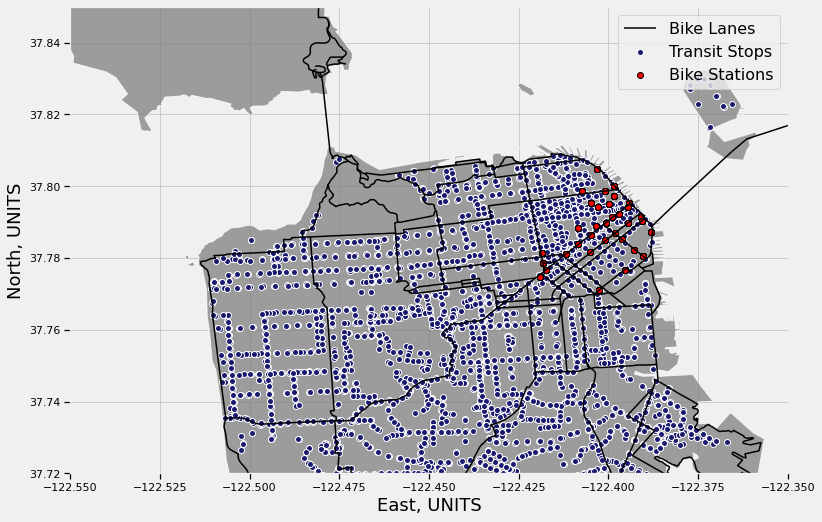

In [71]:
# Plot all three GeoDataFrame together
ax = neighbourhoods.plot(figsize=(15, 8), color='gray', edgecolor='w', alpha=0.75)
bike_lanes.plot(ax=ax, color='black', label = 'Bike Lanes')
transit_stops_gdf.plot(ax=ax, color='midnightblue',edgecolor='w', label = 'Transit Stops')
bikeshare_stations_gdf.plot(ax=ax, color='red', edgecolor='k', label = 'Bike Stations')

plt.legend(fontsize=16,loc='upper right')
plt.xlabel('East, UNITS', fontsize=18)
plt.ylabel('North, UNITS', fontsize=18)
plt.xlim(-122.55,-122.35)
plt.ylim(37.72,37.85)
plt.show()

In [ ]:
# # Create a map of Bay Area
# map_1 = folium.Map(location=[37.8271784, -122.29130780000003], 
#                    tiles='cartodbdark_matter', 
#                    zoom_start=7)

# # Display map
# map_1

In [ ]:
# from folium import Marker

In [ ]:
# # Create a map of Bay Area
# map_2 = folium.Map(location=[37.8271784, -122.29130780000003], 
#                    tiles='cartodbdark_matter', 
#                    zoom_start=7)

# # Add points to the map
# for idx, row in bikeshare_stations_gdf.iterrows():
#     Marker([row.geometry.y, row.geometry.x]).add_to(map_2)

# # Display map
# map_2

In [ ]:
# from folium.plugins import MarkerCluster

In [ ]:
# # Create a map of Bay Area
# map_3 = folium.Map(location=[37.8271784, -122.29130780000003], 
#                    tiles='cartodbdark_matter', 
#                    zoom_start=7)

# # Add points to the map
# mc = MarkerCluster()
# for idx, row in bikeshare_stations_gdf.iterrows():
#     mc.add_child(Marker([row.geometry.y, row.geometry.x]).add_to(map_2))

# map_3.add_child(mc)
    
# # Display map
# map_3

In [ ]:
# from folium import Circle

In [ ]:
# # Create a map of Bay Area
# map_4 = folium.Map(location=[37.8271784, -122.29130780000003], 
#                    tiles='cartodbdark_matter', 
#                    zoom_start=7)

# # Add points to the map
# for idx, row in bikeshare_stations_gdf.iterrows():
#     Circle(location=[row.geometry.y, row.geometry.x],
#            radius=20,
#            color='forestgreen').add_to(map_4)

# # Display map
# map_4